In [2]:
#import pybedtools

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
#import seaborn.objects as so

from scipy.stats import pearsonr, spearmanr
import glob

# Read Data

In [4]:
def flatten_tissues_expand_df(tfbs_df):
    tfbs_part_repeat = tfbs_df.iloc[:,:9]
    tfbs_part_flatten = tfbs_df.iloc[:,9:]
    
    repeat_df =  pd.DataFrame(np.repeat(tfbs_part_repeat.values, tfbs_part_flatten.shape[1], axis=0))
    flatten_arr = tfbs_part_flatten.to_numpy().flatten()

    tissue_repeat = np.tile(np.array(tfbs_part_flatten.columns), len(tfbs_part_repeat))
    
    repeat_df.columns = tfbs_part_repeat.columns
    repeat_df["GeneExpr"] = flatten_arr
    repeat_df["Tissue"] = tissue_repeat
    

    return repeat_df

In [147]:
# path_old = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS.csv"
# #path = r"C:\Users\julia\MyPython\BA\All_TFBS.csv"
df_combined_old = pd.read_csv(path_old)
# df_combined = df_combined[df_combined["chr"] != "chrM"]
# df = df_combined.replace("chrf28811", "MEIS1")
df.to_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS_new.csv", index=False)

In [6]:
# path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS_new.csv"
path = r"C:\Users\julia\MyPython\BA\All_TFBS_new.csv"
df_combined = pd.read_csv(path)

In [7]:
df_combined

chr              geneID      tf  close_tss  dist_tss  \
0        chr1  ENSG00000163209.14  HMBOX1        159       169   
1        chr1  ENSG00000143569.18  HMBOX1          9        19   
2       chr10  ENSG00000213390.10  HMBOX1         47        57   
3        chr1  ENSG00000169241.17  HMBOX1        160       170   
4        chr1  ENSG00000185499.16  HMBOX1        173       183   
...       ...                 ...     ...        ...       ...   
700844   chr7  ENSG00000105851.10  STAT5B         -3         8   
700845   chr7  ENSG00000075790.10  STAT5B        124       135   
700846   chr7   ENSG00000128590.4  STAT5B         54        69   
700847   chr7   ENSG00000198839.9  STAT5B         56        71   
700848   chr7  ENSG00000128512.20  STAT5B        105       120   

       strand_orientation  homotypic_count  all_tfbs_count  \
0                      nT                1              24   
1                       T                1              12   
2                      nT                1              73   
3                      nT                1             115   
4                      nT                1              23   
...                   ...              ...             ...   
700844                  T                1              33   
700845                 nT                1              31   
700846                  T                1              71   
700847                 nT                1             122   
700848                  T                1             104   

        all_tfbs_unique_count  Adipose - Subcutaneous  ...  \
0                          20                   0.691  ...   
1                          11                  50.840  ...   
2                          55                   7.477  ...   
3                          81                  31.560  ...   
4                          20                   5.235  ...   
...                       ...                     ...  ...   
700844                     32                   1.200  ...   
700845                     26                  20.870  ...   
700846                     59                  25.350  ...   
700847                     89                  10.450  ...   
700848                     79                  10.490  ...   

        Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
0                                     1.121                           0.967   
1                                    49.715                          53.410   
2                                     9.733                           9.144   
3                                    41.695                          40.380   
4                                     6.015                           6.711   
...                                     ...                             ...   
700844                                0.251                           0.280   
700845                               12.365                          11.990   
700846                               19.705                          16.970   
700847                               10.200                           9.264   
700848                                2.848                           3.374   

        Small Intestine - Terminal Ileum  Spleen  Stomach  Testis  Thyroid  \
0                                  1.650   2.041    1.969   2.102    1.274   
1                                 35.470  39.380   26.340  65.410   60.040   
2                                  8.263  20.150    4.508  32.780    6.792   
3                                 46.890  52.560   33.060  22.880   46.590   
4                                  9.300   3.004  362.500  36.160   28.620   
...                                  ...     ...      ...     ...      ...   
700844                             2.243   5.790    0.574   4.966    0.878   
700845                             8.953   9.601    8.210  30.260   37.430   
700846                            20.790  25.160   24.560  53.610   42.800  

In [12]:
flat_df = flatten_tissues_expand_df(df_combined)

Variance between Tissues

In [93]:
# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)

# Target Gene Expression

## Relationship between TSS-TFBS distance, Geneexpression and strand orientation 

Chr22, JUN

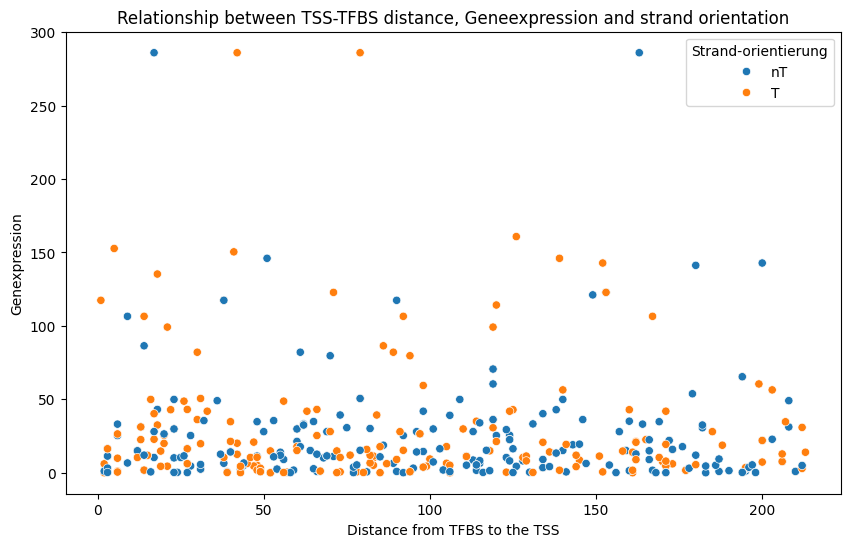

In [36]:
#ChatGPT, Plot der die Beziehung zwischen der Entfernung der TFBS zum TSS und dem Genexpressionswert für verschiedene Strandorientierungen darstellt:
df = df_combined[(df_combined["chr"]=="chr22") & (df_combined["tf"]=="ESR1")]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist_tss', y='Stomach', hue='strand_orientation')
plt.xlabel('Distance from TFBS to the TSS')
plt.ylabel('Genexpression')
plt.title('Relationship between TSS-TFBS distance, Geneexpression and strand orientation')
plt.legend(title='Strand-orientierung')
plt.show()

## Number of Target genes per TF

In [14]:
tf_id_count = flat_df.groupby(["tf"])["geneID"].nunique()

In [276]:
# tf_id_count.to_csv("images/CSV_tf_id_count.csv")

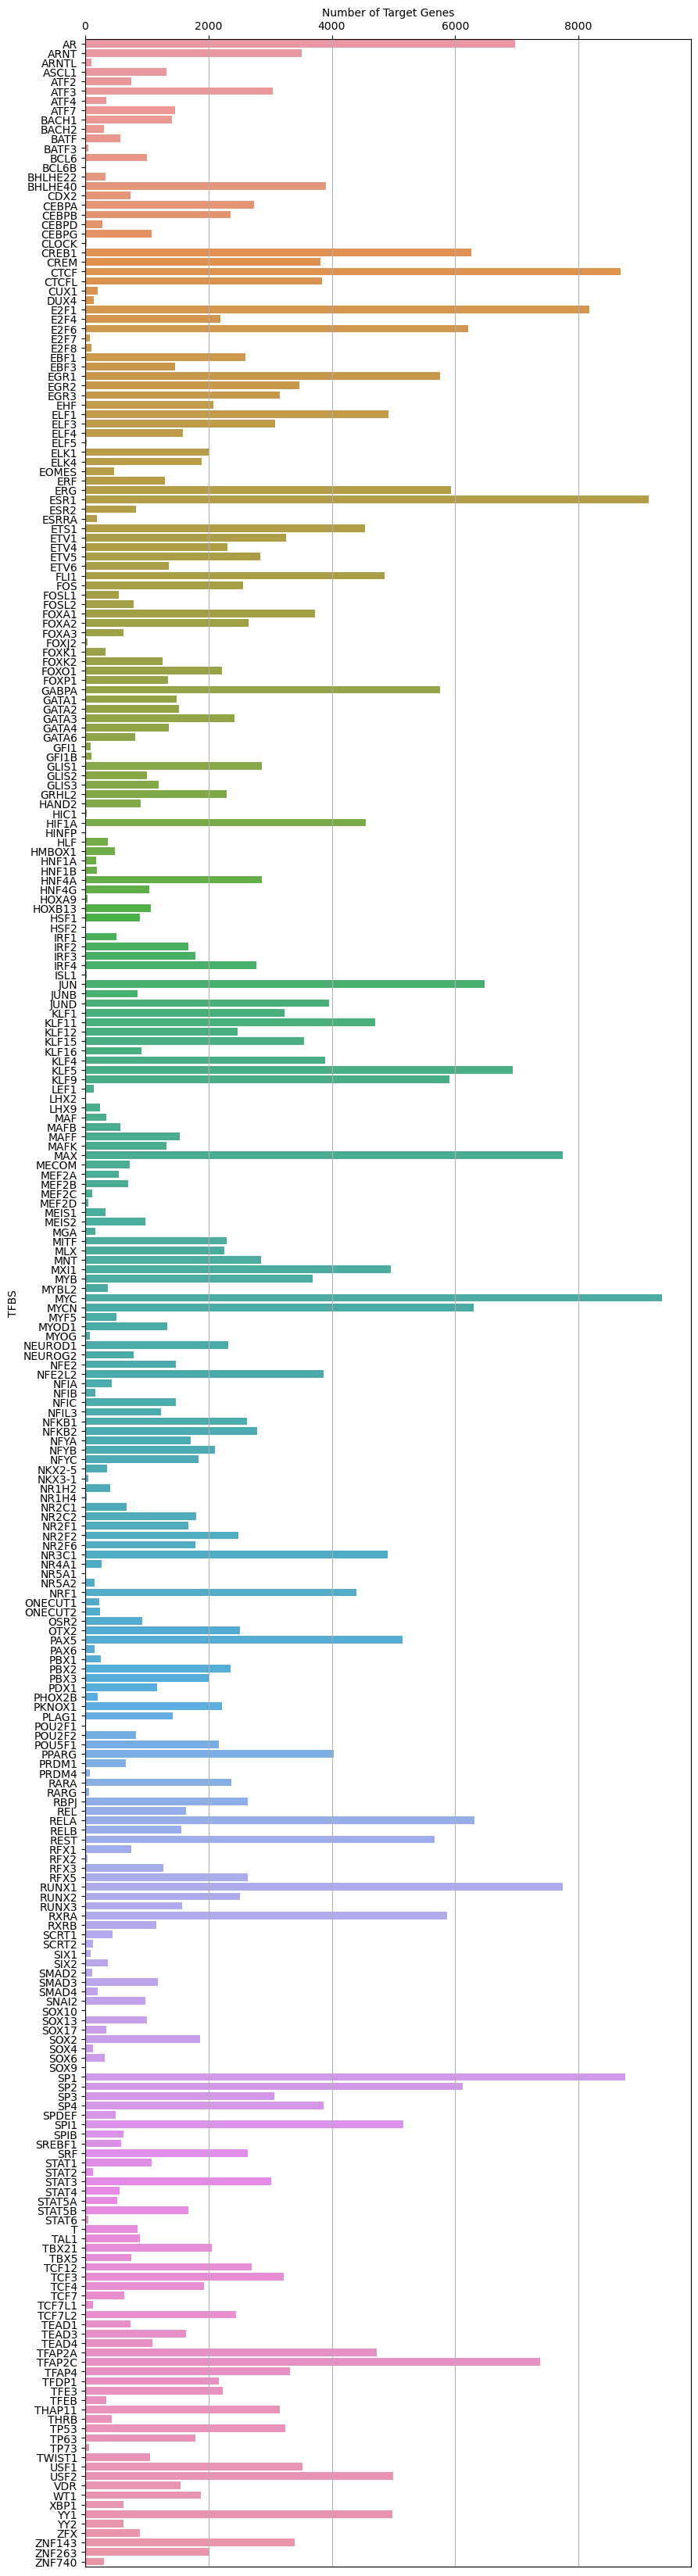

In [23]:
# norm_bar = plt.Normalize(min(tf_id_count.values), max(tf_id_count.values))
# cmap_bar = plt.get_cmap("magma")

fig, ax = plt.subplots(figsize=(10, 42))
sns.barplot(x=tf_id_count.values, y=tf_id_count.index)


ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('Number of Target Genes')
ax.xaxis.set_label_position("top")

ax.xaxis.grid(True)

#fig.savefig("number_of_target_genes.png")

## Mean Target Gene Expression -Flat

First we reduce the Dataset for all homotypic copies of a tfbs per promotor. So that we have for each TF a promotor only once. 

In [12]:
def reduce_homotypic_tfbs_occurence(df):
    occur_region = df.groupby(["chr", "geneID", "tf"]).cumcount()
    df_red = df[occur_region == 0]
    return df_red

In [13]:
df_reduced_homotypic = reduce_homotypic_tfbs_occurence(df_combined)
df_reduced_homotypic_flat = flatten_tissues_expand_df(df_reduced_homotypic)
df_reduced_homotypic_flat

chr              geneID      tf close_tss dist_tss  \
0         chr1  ENSG00000163209.14  HMBOX1       159      169   
1         chr1  ENSG00000163209.14  HMBOX1       159      169   
2         chr1  ENSG00000163209.14  HMBOX1       159      169   
3         chr1  ENSG00000163209.14  HMBOX1       159      169   
4         chr1  ENSG00000163209.14  HMBOX1       159      169   
...        ...                 ...     ...       ...      ...   
28148035  chr7  ENSG00000128512.20  STAT5B       105      120   
28148036  chr7  ENSG00000128512.20  STAT5B       105      120   
28148037  chr7  ENSG00000128512.20  STAT5B       105      120   
28148038  chr7  ENSG00000128512.20  STAT5B       105      120   
28148039  chr7  ENSG00000128512.20  STAT5B       105      120   

         strand_orientation homotypic_count all_tfbs_count  \
0                        nT               1             24   
1                        nT               1             24   
2                        nT               1             24   
3                        nT               1             24   
4                        nT               1             24   
...                     ...             ...            ...   
28148035                  T               1            104   
28148036                  T               1            104   
28148037                  T               1            104   
28148038                  T               1            104   
28148039                  T               1            104   

         all_tfbs_unique_count  GeneExpr                        Tissue  
0                           20     0.691        Adipose - Subcutaneous  
1                           20     1.043  Adipose - Visceral (Omentum)  
2                           20     1.906                 Adrenal Gland  
3                           20     1.397                Artery - Aorta  
4                           20     1.385             Artery - Coronary  
...                        ...       ...                           ...  
28148035                    79     2.226                        Testis  
28148036                    79     7.504                       Thyroid  
28148037                    79    11.100                        Uterus  
28148038                    79     6.597                        Vagina  
28148039                    79     1.472                   Whole Blood  

[28148040 rows x 11 columns]

<span style='background:blue'>
Next we remove all GeneExpr with the value 0 and take the $log_{2}()$ in order to transform the date in a biologigly more usefull scale.
</span>


In [14]:
def remove_zero_and_transform_log2(df_flat, x="GeneExpr"):
    # remove GenExpression values of zero
    df_no_zero = df_flat.copy()[df_flat[x] != 0]
    # transform log2
    df_no_zero["log2_GeneExpr"] = np.log2(df_no_zero[x])
    return df_no_zero
df_log2_GeneExpr = remove_zero_and_transform_log2(df_reduced_homotypic_flat)

In [23]:
def plus_one_and_transform_log2(df_flat, x="GeneExpr"):
    # Add to each Gene Expression values a +1. This prevent values of 0 and makes the data more interpretable.
    df_new_expr = df_flat[x].to_numpy() + 1
    # transform log2
    df_new = df_flat.copy()
    df_new["log2_GeneExpr"] = np.log2(df_new_expr)
    return df_new

In [24]:
# Attention, overrite other variable
# df_log2_GeneExpr = plus_one_and_transform_log2(df_reduced_homotypic_flat)

In [15]:
df_log2_GeneExpr

chr              geneID      tf close_tss dist_tss  \
0         chr1  ENSG00000163209.14  HMBOX1       159      169   
1         chr1  ENSG00000163209.14  HMBOX1       159      169   
2         chr1  ENSG00000163209.14  HMBOX1       159      169   
3         chr1  ENSG00000163209.14  HMBOX1       159      169   
4         chr1  ENSG00000163209.14  HMBOX1       159      169   
...        ...                 ...     ...       ...      ...   
28148035  chr7  ENSG00000128512.20  STAT5B       105      120   
28148036  chr7  ENSG00000128512.20  STAT5B       105      120   
28148037  chr7  ENSG00000128512.20  STAT5B       105      120   
28148038  chr7  ENSG00000128512.20  STAT5B       105      120   
28148039  chr7  ENSG00000128512.20  STAT5B       105      120   

         strand_orientation homotypic_count all_tfbs_count  \
0                        nT               1             24   
1                        nT               1             24   
2                        nT               1             24   
3                        nT               1             24   
4                        nT               1             24   
...                     ...             ...            ...   
28148035                  T               1            104   
28148036                  T               1            104   
28148037                  T               1            104   
28148038                  T               1            104   
28148039                  T               1            104   

         all_tfbs_unique_count  GeneExpr                        Tissue  \
0                           20     0.691        Adipose - Subcutaneous   
1                           20     1.043  Adipose - Visceral (Omentum)   
2                           20     1.906                 Adrenal Gland   
3                           20     1.397                Artery - Aorta   
4                           20     1.385             Artery - Coronary   
...                        ...       ...                           ...   
28148035                    79     2.226                        Testis   
28148036                    79     7.504                       Thyroid   
28148037                    79    11.100                        Uterus   
28148038                    79     6.597                        Vagina   
28148039                    79     1.472                   Whole Blood   

          log2_GeneExpr  
0             -0.533242  
1              0.060739  
2              0.930548  
3              0.482332  
4              0.469886  
...                 ...  
28148035       1.154454  
28148036       2.907660  
28148037       3.472488  
28148038       2.721810  
28148039       0.557778  

[27625761 rows x 12 columns]

<span style='background:blue'>
Next we calculate the mean GeneExpr for each TF
</span>

In [18]:
def get_mean_expression_per_tf(df_flat, x="log2_GeneExpr"):
    return df_flat.groupby(["tf"])[x].mean()

<span style='background:blue'>
Now we sort the tfs
</span>

In [20]:
# Sort DataFrame
df_log2_GeneExpr_sort = df_log2_GeneExpr.sort_values(by="tf")

In [21]:
df_log2_GeneExpr_sort_mean = get_mean_expression_per_tf(df_log2_GeneExpr_sort)
df_log2_GeneExpr_sort_mean.sort_values().index
# tf_id_count.reindex(df_log2_GeneExpr_sort_mean.sort_values().index)

Index(['ISL1', 'HNF1A', 'HNF1B', 'SOX10', 'NR1H4', 'LHX2', 'DUX4', 'BATF3',
       'GATA6', 'SIX1',
       ...
       'HSF1', 'YY2', 'NR2C2', 'ELK1', 'CLOCK', 'NR2C1', 'HSF2', 'TFEB',
       'XBP1', 'NR5A1'],
      dtype='object', name='tf', length=266)

<span style='background:blue'>
To see if the number of Target-Genes correlate with the mean Target-Gene Expression
</span>

<Axes: xlabel='log2_GeneExpr', ylabel='Count'>

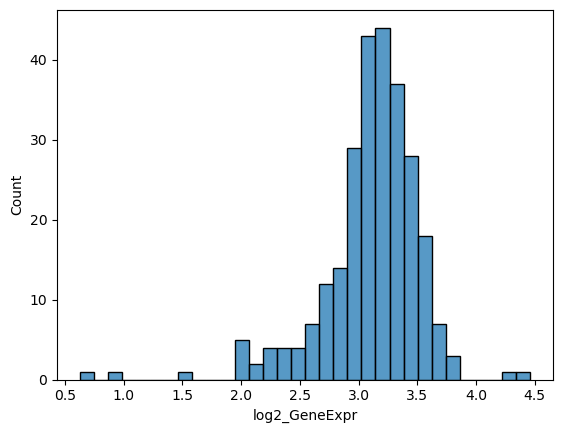

In [22]:
# sns.histplot(np.log2((tf_id_count)))
sns.histplot(df_log2_GeneExpr_sort_mean)

In [32]:
pearsonr(np.log2(tf_id_count), df_log2_GeneExpr_sort_mean)

PearsonRResult(statistic=0.23182295584879414, pvalue=0.00013606438099054454)

<span style='background:blue'>
Colormap to show the mean values of the GeneExpression
</span>

In [25]:
norm = plt.Normalize(df_log2_GeneExpr_sort_mean.min(), df_log2_GeneExpr_sort_mean.max())
sm = mpl.cm.ScalarMappable(cmap="viridis", norm=norm)
my_cmap = mpl.colormaps["viridis"]

color_i = {df_log2_GeneExpr_sort_mean.index[i]:my_cmap(norm(df_log2_GeneExpr_sort_mean[i])) for i in range(len(df_log2_GeneExpr_sort_mean))}

In [26]:
df_log2_GeneExpr_sort

chr              geneID      tf close_tss dist_tss  \
1120452   chr19  ENSG00000073008.14      AR        84      101   
1177754    chr4  ENSG00000172493.20      AR       133      150   
1177753    chr4  ENSG00000172493.20      AR       133      150   
1177752    chr4  ENSG00000172493.20      AR       133      150   
1177751    chr4  ENSG00000172493.20      AR       133      150   
...         ...                 ...     ...       ...      ...   
18156024  chr19   ENSG00000141968.7  ZNF740        70       83   
18156025  chr19   ENSG00000141968.7  ZNF740        70       83   
18156026  chr19   ENSG00000141968.7  ZNF740        70       83   
18155996  chr19   ENSG00000141968.7  ZNF740        70       83   
18153174  chr11   ENSG00000278615.4  ZNF740       161      174   

         strand_orientation homotypic_count all_tfbs_count  \
1120452                   T               1             37   
1177754                  nT               2             70   
1177753                  nT               2             70   
1177752                  nT               2             70   
1177751                  nT               2             70   
...                     ...             ...            ...   
18156024                 nT               1             35   
18156025                 nT               1             35   
18156026                 nT               1             35   
18155996                 nT               1             35   
18153174                 nT               1             66   

         all_tfbs_unique_count  GeneExpr  \
1120452                     37    16.870   
1177754                     51     5.012   
1177753                     51     5.799   
1177752                     51     5.923   
1177751                     51     6.688   
...                        ...       ...   
18156024                    32    20.880   
18156025                    32     7.374   
18156026                    32     0.386   
18155996                    32     1.384   
18153174                    51    19.220   

                                            Tissue  log2_GeneExpr  
1120452                                    Bladder       4.076388  
1177754                        Brain - Hippocampus       2.325386  
1177753               Brain - Frontal Cortex (BA9)       2.535804  
1177752                             Brain - Cortex       2.566328  
1177751                         Brain - Cerebellum       2.741575  
...                                            ...            ...  
18156024                                      Lung       4.384050  
18156025                      Minor Salivary Gland       2.882447  
18156026                         Muscle - Skeletal      -1.373327  
18155996  Brain - Anterior cingulate cortex (BA24)       0.468844  
18153174                                   Stomach       4.264536  

[27625761 rows x 12 columns]

<span style='background:blue'>
Plot
</span>

In [26]:
y1_order = df_log2_GeneExpr_sort_mean.index
y2_order = tf_id_count

# Sort boxplot by mean GeneExpr
# y1_order = df_log2_GeneExpr_sort_mean.sort_values(ascending=False).index
# y2_order = tf_id_count.reindex(y1_order)
# sns.barplot(x=y2_order.index, y=y2_order.values, )
# sns.barplot(y2_order)
# print(df_mean_expr_count[df_mean_expr_count["# Target Genes"] > 6000].sort_values(by="# Target Genes", ascending=False).to_latex())
# print(df_mean_expr_count[df_mean_expr_count["# Target Genes"] > 6000].sort_values(by="# Target Genes", ascending=False).index)

### Jointplot

In [27]:
df_mean_expr_count = df_log2_GeneExpr_sort_mean.to_frame(name="$log_2$(Gene Expression)").join(tf_id_count.to_frame(name="# Target Genes"))
xAR, yAR = df_mean_expr_count.loc["AR"]

In [30]:
def get_annotation_joint(df_mean_expr_count, tf):
    x_tf, y_tf = df_mean_expr_count.loc[tf]
    return x_tf, y_tf


In [35]:
x_tf, y_tf = get_annotation_joint(df_mean_expr_count, "AR")
x_tf, y_tf

(3.0903028044739034, 6973.0)

In [37]:
tf_most_target_genes_loop = ['ESR1', 'E2F1',  'RUNX1',   'KLF5']

tf_smallest_expr_loop = ["HNF1B", "ISL1"]
tf_biggest_expr_loop = ["XBP1", "TFEB",  "NR2C1"]
all_annotations_loop = tf_most_target_genes_loop + tf_smallest_expr_loop + tf_biggest_expr_loop

In [337]:
["HNF1A", "SOX10",  "HSF2", "NR5A1", 'MYC', 'CTCF', 'MAX','AR','TFAP2C', 'JUN',  'MYCN', 'E2F6', 'SP2', 'CREB1',  'SP1', "NR1H4", "RELA"]

['HNF1A',
 'SOX10',
 'HSF2',
 'NR5A1',
 'MYC',
 'CTCF',
 'MAX',
 'AR',
 'TFAP2C',
 'JUN',
 'MYCN',
 'E2F6',
 'SP2',
 'CREB1',
 'SP1']

In [39]:
def plt_annotate_tf(tf, x_var, y_var):
    xy = get_annotation_joint(df_mean_expr_count, tf)
    x_text = xy[0] + x_var
    y_text = xy[1] + y_var
    plt.annotate(text=tf, xy=xy, xytext=(x_text,y_text), arrowprops=dict(arrowstyle="-")).set_fontsize(8)

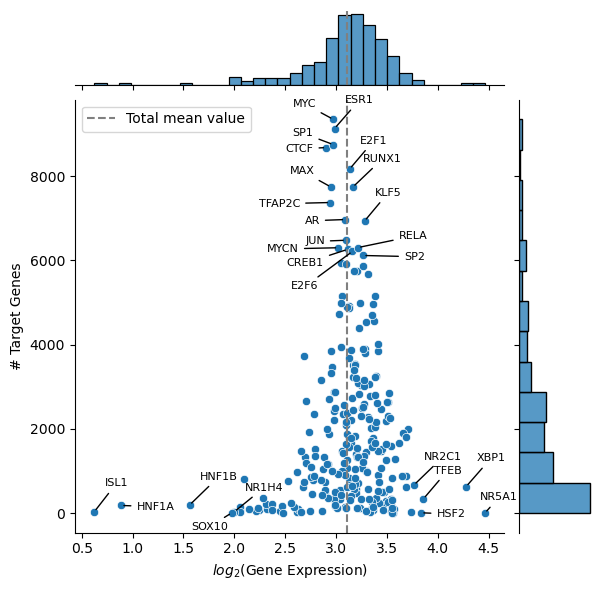

In [41]:
# fig, ax = plt.subplots(figsize=(10, 6)) 
g = sns.jointplot(df_mean_expr_count, x="$log_2$(Gene Expression)", y="# Target Genes")

# Annotations
for tf in all_annotations_loop:
    xy = get_annotation_joint(df_mean_expr_count, tf)
    x_text = xy[0] + 0.1
    y_text = xy[1] + 600
    plt.annotate(text=tf, xy=xy, xytext=(x_text,y_text), arrowprops=dict(arrowstyle="-")).set_fontsize(8)

# ["HNF1A", "SOX10",  "HSF2", "NR5A1", 'MYC', 'CTCF', 'MAX','AR','TFAP2C', 'JUN',  'MYCN', 'E2F6', 'SP2', 'CREB1',  'SP1']
plt_annotate_tf("HNF1A", 0.15, -100)
plt_annotate_tf("SOX10", -0.4, -400)
plt_annotate_tf("NR1H4", 0.1, 500)

plt_annotate_tf("HSF2", 0.15, -100)
plt_annotate_tf("NR5A1", -0.05, 300)

plt_annotate_tf("MYC", -0.4, 300)
plt_annotate_tf("CTCF", -0.4, -100)
plt_annotate_tf("SP1",  -0.4, 200)
plt_annotate_tf("MAX",-0.4, 300)
plt_annotate_tf("AR", -0.4, -100)
plt_annotate_tf("TFAP2C", -0.7, -100)
plt_annotate_tf("JUN",  -0.4, -100)
plt_annotate_tf("MYCN",  -0.7, -100)
plt_annotate_tf("E2F6",  -0.6, -900)
plt_annotate_tf("CREB1",  -0.6, -400)

plt_annotate_tf("RELA",  0.4, 200)
plt_annotate_tf("SP2",  0.4, -100)



g.refline(x=df_mean_expr_count["$log_2$(Gene Expression)"].mean(), label="Total mean value")
plt.legend()

# plt.savefig("images_BA/jointplot_meanGeneExpr_countTargetGene.png")

In [49]:
df_mean_expr_count["$log_2$(Gene Expression)"].mean()

3.103782029609614

In [61]:
df_log2_GeneExpr_sort[df_log2_GeneExpr_sort.tf == "NR5A1"].log2_GeneExpr.max()

5.7366048753142485

In [63]:
df_log2_GeneExpr_sort[df_log2_GeneExpr_sort.tf == "NR5A1"].log2_GeneExpr.min()

2.6830226650636826

In [98]:
df_log2_GeneExpr_sort

chr              geneID      tf close_tss dist_tss  \
1120452   chr19  ENSG00000073008.14      AR        84      101   
1177754    chr4  ENSG00000172493.20      AR       133      150   
1177753    chr4  ENSG00000172493.20      AR       133      150   
1177752    chr4  ENSG00000172493.20      AR       133      150   
1177751    chr4  ENSG00000172493.20      AR       133      150   
...         ...                 ...     ...       ...      ...   
18156024  chr19   ENSG00000141968.7  ZNF740        70       83   
18156025  chr19   ENSG00000141968.7  ZNF740        70       83   
18156026  chr19   ENSG00000141968.7  ZNF740        70       83   
18155996  chr19   ENSG00000141968.7  ZNF740        70       83   
18153174  chr11   ENSG00000278615.4  ZNF740       161      174   

         strand_orientation homotypic_count all_tfbs_count  \
1120452                   T               1             37   
1177754                  nT               2             70   
1177753                  nT               2             70   
1177752                  nT               2             70   
1177751                  nT               2             70   
...                     ...             ...            ...   
18156024                 nT               1             35   
18156025                 nT               1             35   
18156026                 nT               1             35   
18155996                 nT               1             35   
18153174                 nT               1             66   

         all_tfbs_unique_count  GeneExpr  \
1120452                     37    16.870   
1177754                     51     5.012   
1177753                     51     5.799   
1177752                     51     5.923   
1177751                     51     6.688   
...                        ...       ...   
18156024                    32    20.880   
18156025                    32     7.374   
18156026                    32     0.386   
18155996                    32     1.384   
18153174                    51    19.220   

                                            Tissue  log2_GeneExpr  
1120452                                    Bladder       4.076388  
1177754                        Brain - Hippocampus       2.325386  
1177753               Brain - Frontal Cortex (BA9)       2.535804  
1177752                             Brain - Cortex       2.566328  
1177751                         Brain - Cerebellum       2.741575  
...                                            ...            ...  
18156024                                      Lung       4.384050  
18156025                      Minor Salivary Gland       2.882447  
18156026                         Muscle - Skeletal      -1.373327  
18155996  Brain - Anterior cingulate cortex (BA24)       0.468844  
18153174                                   Stomach       4.264536  

[27625761 rows x 12 columns]

In [116]:
df_hist = pd.DataFrame(df_log2_GeneExpr_sort.groupby(["geneID"])["all_tfbs_unique_count"].max())
df_hist["diff_lfc"] = df_log2_GeneExpr_sort.groupby(["geneID"])["log2_GeneExpr"].agg(lambda x: x.max() -x.min())

In [176]:
# sns.histplot(df_reduced_homotypic_flat.groupby(["geneID"])["GeneExpr"].agg(lambda x: x.max() -x.min()))

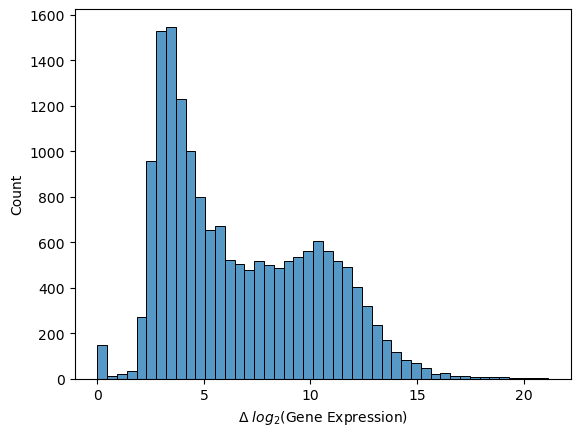

In [162]:
h = sns.histplot(data=df_hist, x="diff_lfc")
plt.xlabel("$\Delta$ $log_2$(Gene Expression)")
# plt.ylabel("")
# plt.title("Distribution of gene expression level difference")
plt.savefig("images_BA/hist_target_diff.pdf")

### Boxplot

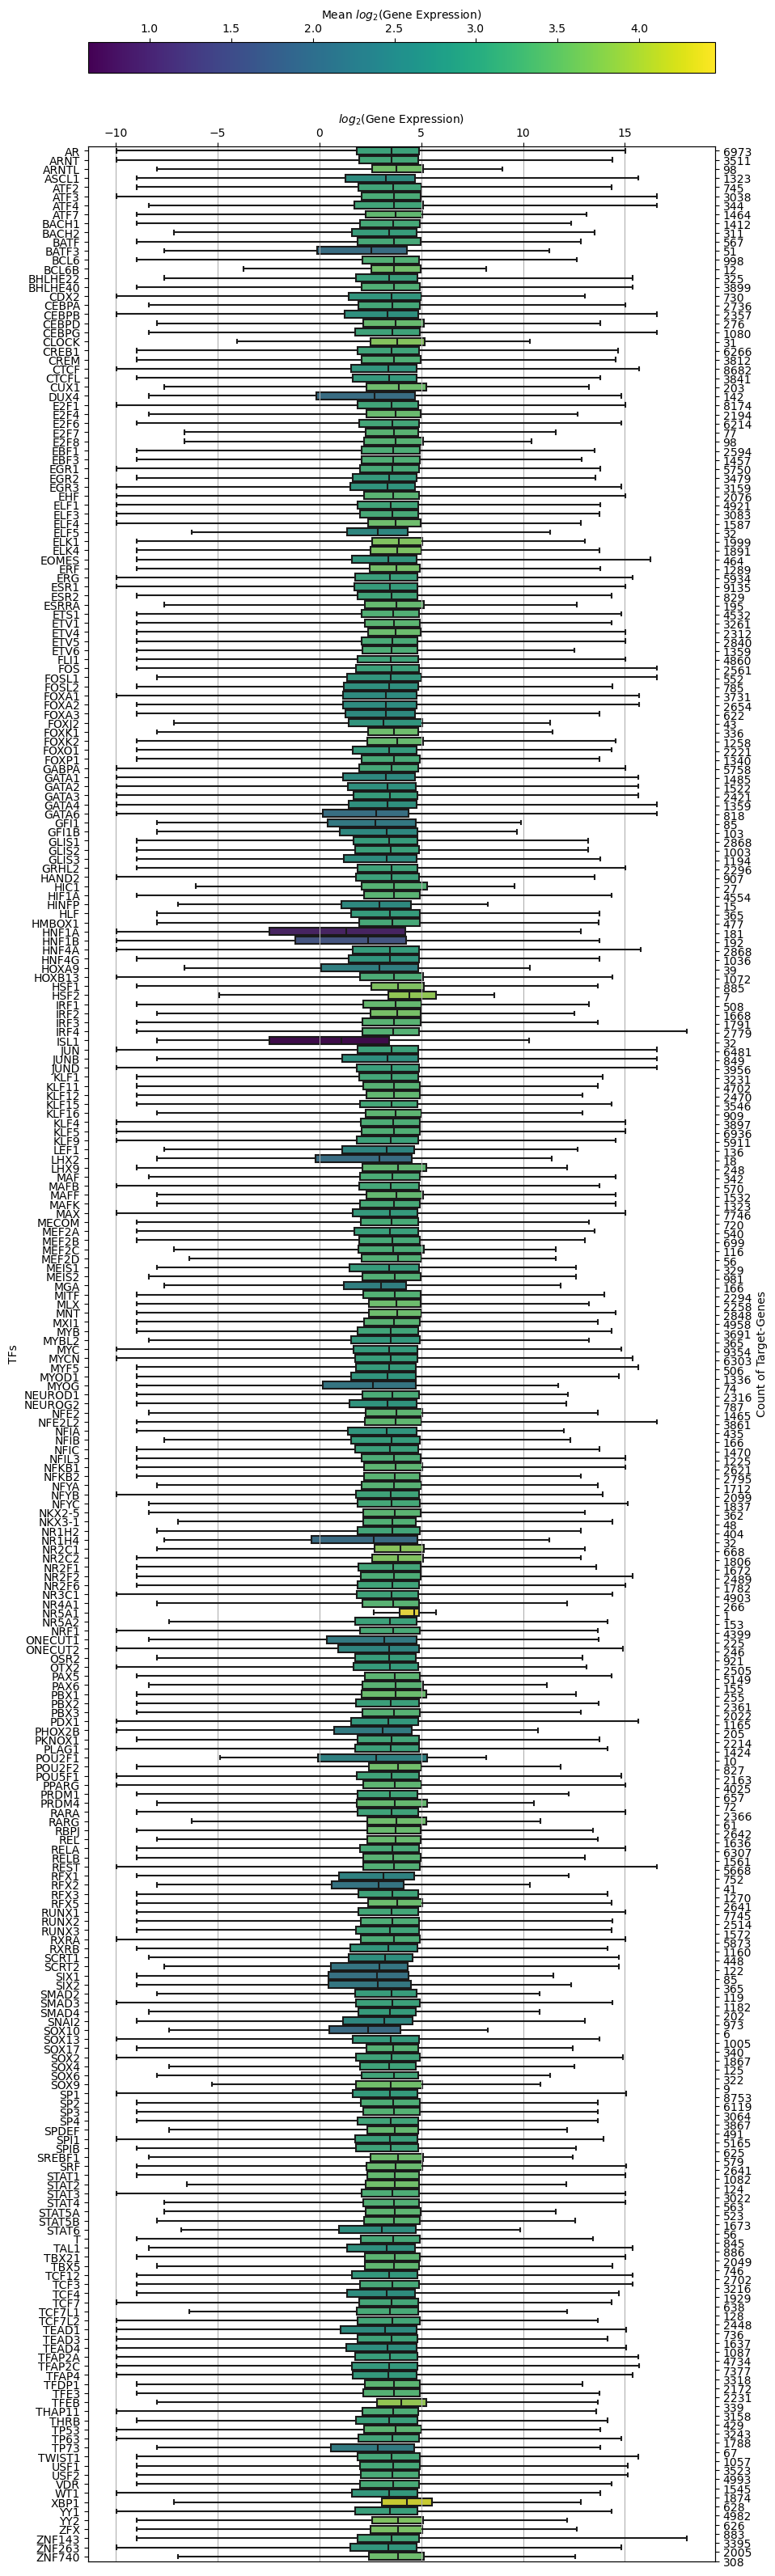

In [71]:
fig, ax = plt.subplots(figsize=(10, 47)) 
sns.boxplot(df_log2_GeneExpr_sort, x="log2_GeneExpr", y="tf",whis=(0, 100), palette=color_i, order=y1_order)

ax.set_ylabel('TFs')

ax.xaxis.tick_top()
ax.set_xlabel('$log_2$(Gene Expression)')
ax.xaxis.set_label_position("top")

ax.xaxis.grid(True)

# plt.subplots_adjust(top=1.2)
cbar = ax.figure.colorbar(sm, ax=ax, orientation= "horizontal", location="top" , pad=0.025)
cbar.set_label("Mean $log_2$(Gene Expression)")

ax2 = ax.twinx()
ax2.set_ylabel("Count of Target-Genes")
ax2.set_ylim([0,ax.get_ylim()[0]])
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(y2_order.values[::-1])

# fig.savefig("images_BA/Mean_GeneExpr_Flat.png")

In [37]:
df_log2_GeneExpr_sort.GeneExpr.max()

267400.0

### Mean Target Expression -One Tissue -Test

In [32]:
df_log_pancreas = remove_zero_and_transform_log2(df_reduced_homotypic, x="Pancreas")

In [37]:
# Sort DataFrame
df_log_pancreasr_sort = df_log_pancreas.sort_values(by="tf")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 42)) 
sns.boxplot(df_log_pancreasr_sort, x="log2_GeneExpr", y="tf",whis=(0, 100))

ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('log2(GeneExpr)')
ax.xaxis.set_label_position("top")

ax.xaxis.grid(True)

## Heatmap to visualize Genexpression per Tissue

In [15]:
# Heatmap to mao geneexpression values for each TF and each Tissue
pivot_df = flat_df.pivot_table(index="tf", columns="Tissue", values="GeneExpr", aggfunc="mean")

### New and plot

In [17]:
# New Dataframe where all 0 Expression values where replaced through NANs tot not interfere with the np.log2 transforamtion. And only the tfs and the expression values are saved.
df_expr_log = pd.DataFrame({"tf": df_combined.tf}).join(np.log2(df_combined.iloc[:,9:].replace(0, np.NAN)))

# Group the TFs and calculate the mean, the Nans will automatically ignored.
mean_log2_expr_per_tissue = df_expr_log.groupby(["tf"]).mean()
# mean_log2_expr_per_tissue.to_csv("images/CSV_log2_mean_GenExr_diffrent_tissue_all_TFBS_ROBUST_extend_with_traget_gene_count.csv")

In [158]:
#pivot_df.to_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Working_Notes/mean_GenExr_for_all_TFBS_in_tissue.csv")
# mean_log2_expr_per_tissue = np.log2(pivot_df)
# mean_log2_expr_per_tissue.index

Index(['AR', 'ARNT', 'ARNTL', 'ASCL1', 'ATF2', 'ATF3', 'ATF4', 'ATF7', 'BACH1',
       'BACH2',
       ...
       'VDR', 'WT1', 'XBP1', 'YY1', 'YY2', 'ZFX', 'ZNF143', 'ZNF263', 'ZNF740',
       'chrf28811'],
      dtype='object', name='tf', length=267)

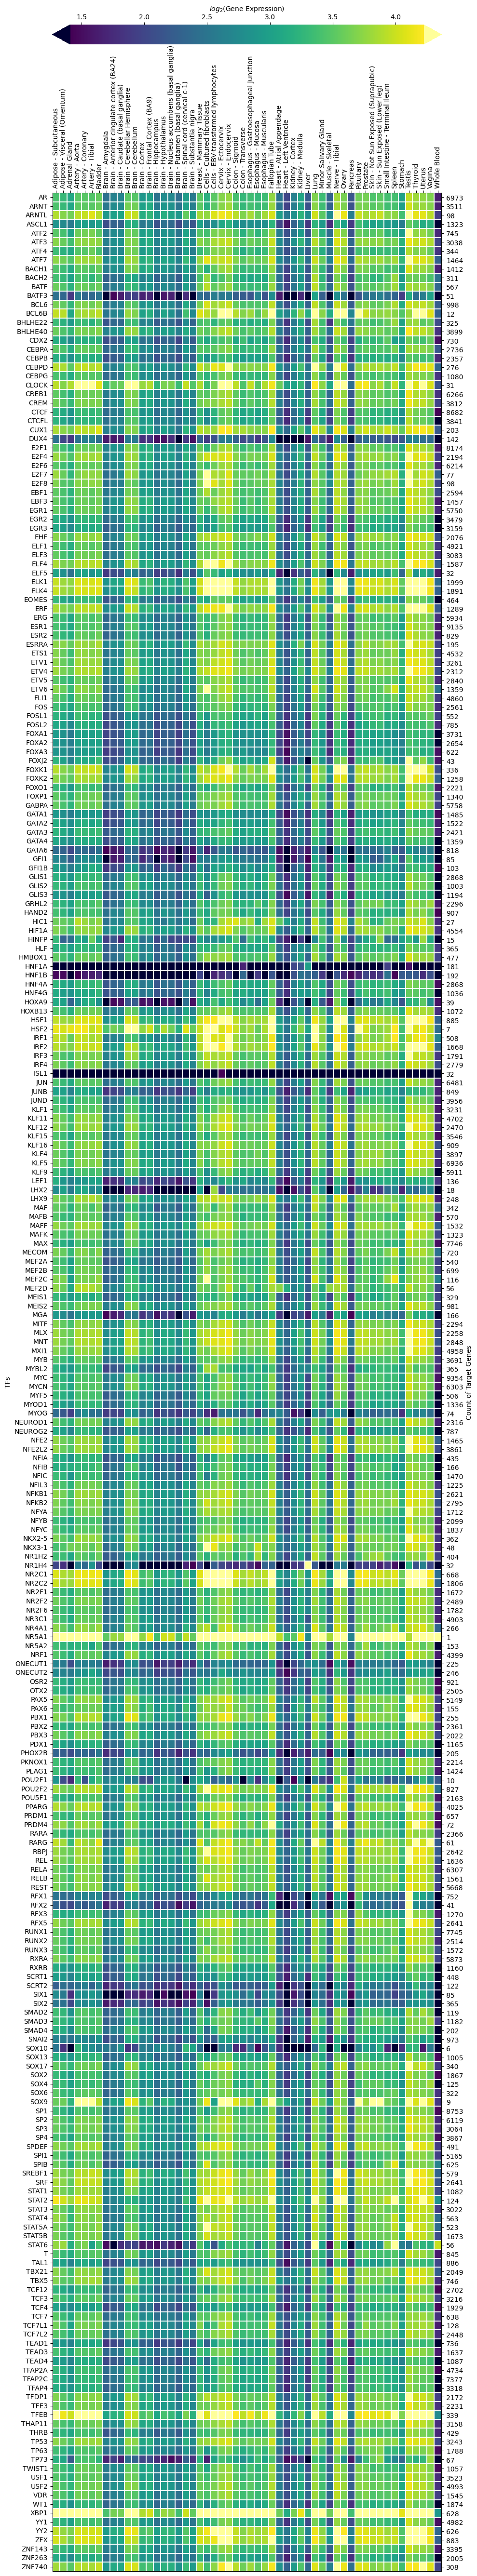

In [328]:
value_max = max(mean_log2_expr_per_tissue.max())
value_min = min(mean_log2_expr_per_tissue.min())

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")

fig, ax = plt.subplots(figsize=(10, 62))
heatmap = sns.heatmap(mean_log2_expr_per_tissue,cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, robust=True)

#plt.title('Genexpression in different tissues')
plt.xlabel('Tissues')
plt.ylabel('TFs')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)

ax2 = ax.twinx()
ax2.set_ylabel("Count of Target Genes")
ax2.set_ylim([0,ax.get_ylim()[0]])
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(tf_id_count.values[::-1])

plt.tight_layout()
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/log2_mean_GenExr_diffrent_tissue_all_TFBS_ROBUST_extend.png")
# fig.savefig("images_BA/target_gene_heatmap.png")
plt.show()



### Mean row and col

In [335]:
# Min and Max
print(mean_log2_expr_per_tissue.max(axis=1).idxmax(), mean_log2_expr_per_tissue.max().idxmax(), mean_log2_expr_per_tissue.max(axis=1).max())
print(mean_log2_expr_per_tissue.min(axis=1).idxmin(), mean_log2_expr_per_tissue.min().idxmin(), mean_log2_expr_per_tissue.min(axis=1).min())


NR5A1 Esophagus - Mucosa 5.7366048753142485
SOX10 Whole Blood -2.5397983133081667


In [376]:
# Reduce df_combined to geneID and log transformed Expression values (wie oben nur mit geneID)
df_test = pd.DataFrame({"geneID":df_combined.geneID}).join(np.log2(df_combined.iloc[:,9:].replace(0, np.NAN)))

In [510]:
# reduce Dataframe to single GeneID --> every Gene only once!
df_red = df_test[df_test.groupby(["geneID"]).cumcount() == 0]
df_red

geneID  Adipose - Subcutaneous  \
0       ENSG00000163209.14               -0.533242   
1       ENSG00000143569.18                5.667892   
2       ENSG00000213390.10                2.902460   
3       ENSG00000169241.17                4.980025   
4       ENSG00000185499.16                2.388190   
...                    ...                     ...   
694090  ENSG00000144481.16               -6.506353   
694918   ENSG00000198914.3                1.086104   
696966   ENSG00000235711.4               -3.120294   
697958   ENSG00000005381.7               -1.630394   
699899  ENSG00000189269.12                0.215368   

        Adipose - Visceral (Omentum)  Adrenal Gland  Artery - Aorta  \
0                           0.060739       0.930548        0.482332   
1                           5.444270       5.180506        5.616181   
2                           2.794312       1.879314        2.156720   
3                           5.069960       5.505097        4.737957   
4                           2.836530       1.288063        3.502076   
...                              ...            ...             ...   
694090                           NaN      -7.158429             NaN   
694918                     -4.921390      -3.522841        0.355016   
696966                     -5.442222            NaN       -3.426625   
697958                     -1.077041      -2.490051       -0.701342   
699899                      0.191563       0.412511       -0.242977   

        Artery - Coronary  Artery - Tibial   Bladder  Brain - Amygdala  \
0                0.469886        -0.473931  2.519290         -2.095420   
1                5.548591         5.797532  5.782671          4.074677   
2                2.566328         1.879706  2.949535          1.843180   
3                4.783719         4.344828  4.852998          2.604071   
4                3.918386         3.393691  4.218006         -0.210897   
...                   ...              ...       ...               ...   
694090                NaN              NaN -6.965784         -5.717857   
694918          -3.608232        -2.756331 -4.921390          4.772150   
696966          -1.197600         0.045443       NaN         -1.625934   
697958          -1.481969        -3.058894 -1.816037         -0.349235   
699899           0.034216        -0.205896  0.325386         -1.590745   

        Brain - Anterior cingulate cortex (BA24)  ...  \
0                                      -1.603841  ...   
1                                       4.430954  ...   
2                                       1.635522  ...   
3                                       2.643856  ...   
4                                      -0.195946  ...   
...                                          ...  ...   
694090                                 -5.210897  ...   
694918                                  5.137299  ...   
696966                                 -0.067939  ...   
697958                                  0.284514  ...   
699899                                 -1.399730  ...   

        Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
0                                  0.164786                       -0.048412   
1                                  5.635609                        5.739038   
2                                  3.282885                        3.192825   
3                                  5.381802                        5.335569   
4                                  2.588565                        2.746528   
...                                     ...                             ...   
694090                            -6.058894                       -5.058894   
694918                            -0.128156                        1.393416   
696966                                  NaN                       -5.107803   
697958                            -3.643856                       -3.000000   
699899                             0.385155                        0.224040

In [440]:
# Calculate the mean of each column and row
col_means = df_red.mean(axis=0)

# pd.Series(index=col_means.index)
mean_log2_expr_per_tissue_copy.mean(axis=1)

C:\Users\julia\AppData\Local\Temp\ipykernel_29204\1674652316.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_means = df_red.mean(axis=0)


Column Mean    2.329998
AR             3.161365
ARNT           3.193311
ARNTL          3.568817
ASCL1          2.706240
                 ...   
YY2            3.691239
ZFX            3.672755
ZNF143         3.200974
ZNF263         2.907645
ZNF740         3.547647
Length: 267, dtype: float64

In [959]:
## mean row and col 
mean_log2_expr_per_tissue_copy = mean_log2_expr_per_tissue.copy()

# mean_log2_expr_per_tissue_copy = pd.concat([pd.Series(index=col_means.index).to_frame(name="").T, mean_log2_expr_per_tissue_copy])
mean_log2_expr_per_tissue_copy = pd.concat([col_means.to_frame(name="Column Mean").T, mean_log2_expr_per_tissue_copy])

# mean_log2_expr_per_tissue_copy[""] =pd.Series(index= mean_log2_expr_per_tissue_copy.index)
mean_log2_expr_per_tissue_copy["Row Mean"] = mean_log2_expr_per_tissue_copy.mean(axis=1)

In [537]:
mean_log2_expr_per_tissue_copy

Adipose - Subcutaneous  Adipose - Visceral (Omentum)  \
Column Mean                2.573793                      2.487600   
AR                         3.420831                      3.291073   
ARNT                       3.431647                      3.298134   
ARNTL                      3.888441                      3.702171   
ASCL1                      2.871638                      2.743776   
...                             ...                           ...   
YY2                        3.947254                      3.772117   
ZFX                        4.028346                      3.861831   
ZNF143                     3.418908                      3.280622   
ZNF263                     3.116693                      3.012749   
ZNF740                     3.832828                      3.700151   

             Adrenal Gland  Artery - Aorta  Artery - Coronary  \
Column Mean       2.163193        2.659590           2.656233   
AR                3.092793        3.501410           3.496182   
ARNT              3.089342        3.521907           3.516800   
ARNTL             3.623384        3.943046           3.981699   
ASCL1             2.570522        2.978152           2.994517   
...                    ...             ...                ...   
YY2               3.671533        4.046747           4.030437   
ZFX               3.627951        4.092485           4.061392   
ZNF143            3.128250        3.521017           3.507290   
ZNF263            2.736366        3.193006           3.193911   
ZNF740            3.483572        3.913162           3.888342   

             Artery - Tibial   Bladder  Brain - Amygdala  \
Column Mean         2.570915  2.661928          1.776876   
AR                  3.462804  3.548230          2.463566   
ARNT                3.488125  3.564901          2.536926   
ARNTL               4.084618  3.910816          2.918904   
ASCL1               2.894464  3.018092          2.065521   
...                      ...       ...               ...   
YY2                 4.021007  4.035994          2.951955   
ZFX                 4.018208  4.085256          2.852873   
ZNF143              3.448427  3.568365          2.564329   
ZNF263              3.112232  3.246290          2.403165   
ZNF740              3.840691  3.971350          2.902753   

             Brain - Anterior cingulate cortex (BA24)  \
Column Mean                                  1.955428   
AR                                           2.653196   
ARNT                                         2.754313   
ARNTL                                        3.001732   
ASCL1                                        2.297008   
...                                               ...   
YY2                                          3.163771   
ZFX                                          3.014604   
ZNF143                                       2.766983   
ZNF263                                       2.621029   
ZNF740                                       3.114954   

             Brain - Caudate (basal ganglia)  ...  \
Column Mean                         1.967896  ...   
AR                                  2.674123  ...   
ARNT                                2.763407  ...   
ARNTL                               3.049413  ...   
ASCL1                               2.300031  ...   
...                                      ...  ...   
YY2                                 3.183541  ...   
ZFX                                 3.089167  ...   
ZNF143                              2.792375  ...   
ZNF263                              2.604894  ...   
ZNF740                              3.089753  ...   

             Skin - Sun Exposed (Lower leg)  Small Intestine - Terminal Ileum  \
Column Mean                        2.639282                          2.566934   
AR                                 3.501643                          3.378551   
ARNT                               3.548369                          3.365862   
ARNTL                              3

In [591]:
# adapt target gene counts
new_tf_id_count = np.append(tf_id_count.values[::-1], len(df_red))

In [ ]:
# PLot
value_max = max(mean_log2_expr_per_tissue.max())
value_min = min(mean_log2_expr_per_tissue.min())

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")

fig, ax = plt.subplots(figsize=(10, 62))
heatmap = sns.heatmap(mean_log2_expr_per_tissue_copy,cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, robust=True)

#plt.title('Genexpression in different tissues')
plt.xlabel('Tissues')
plt.ylabel('TFs')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)

ax2 = ax.twinx()
ax2.set_ylabel("Count of Target Genes")
ax2.set_ylim([0,ax.get_ylim()[0]])
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(new_tf_id_count)

plt.tight_layout()
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/log2_mean_GenExr_diffrent_tissue_all_TFBS_ROBUST_extend.png")
# fig.savefig("images_BA/target_gene_heatmap.png")
plt.show()

In [1021]:
mean_log2_expr_per_tissue_copy.iloc[:1,:54]
tf_id_count.values[::-1]

array([ 308, 2005, 3395,  883,  626, 4982,  628, 1874, 1545, 4993, 3523,
       1057,   67, 1788, 3243,  429, 3158,  339, 2231, 2172, 3318, 7377,
       4734, 1087, 1637,  736, 2448,  128,  638, 1929, 3216, 2702,  746,
       2049,  886,  845,   56, 1673,  523,  563, 3022,  124, 1082, 2641,
        579,  625, 5165,  491, 3867, 3064, 6119, 8753,    9,  322,  125,
       1867,  340, 1005,    6,  973,  202, 1182,  119,  365,   85,  122,
        448, 1160, 5873, 1572, 2514, 7745, 2641, 1270,   41,  752, 5668,
       1561, 6307, 1636, 2642,   61, 2366,   72,  657, 4025, 2163,  827,
         10, 1424, 2214,  205, 1165, 2022, 2361,  255,  155, 5149, 2505,
        921,  246,  225, 4399,  153,    1,  266, 4903, 1782, 2489, 1672,
       1806,  668,   32,  404,   48,  362, 1837, 2099, 1712, 2795, 2621,
       1225, 1470,  166,  435, 3861, 1465,  787, 2316,   74, 1336,  506,
       6303, 9354,  365, 3691, 4958, 2848, 2258, 2294,  166,  981,  329,
         56,  116,  699,  540,  720, 7746, 1323, 15

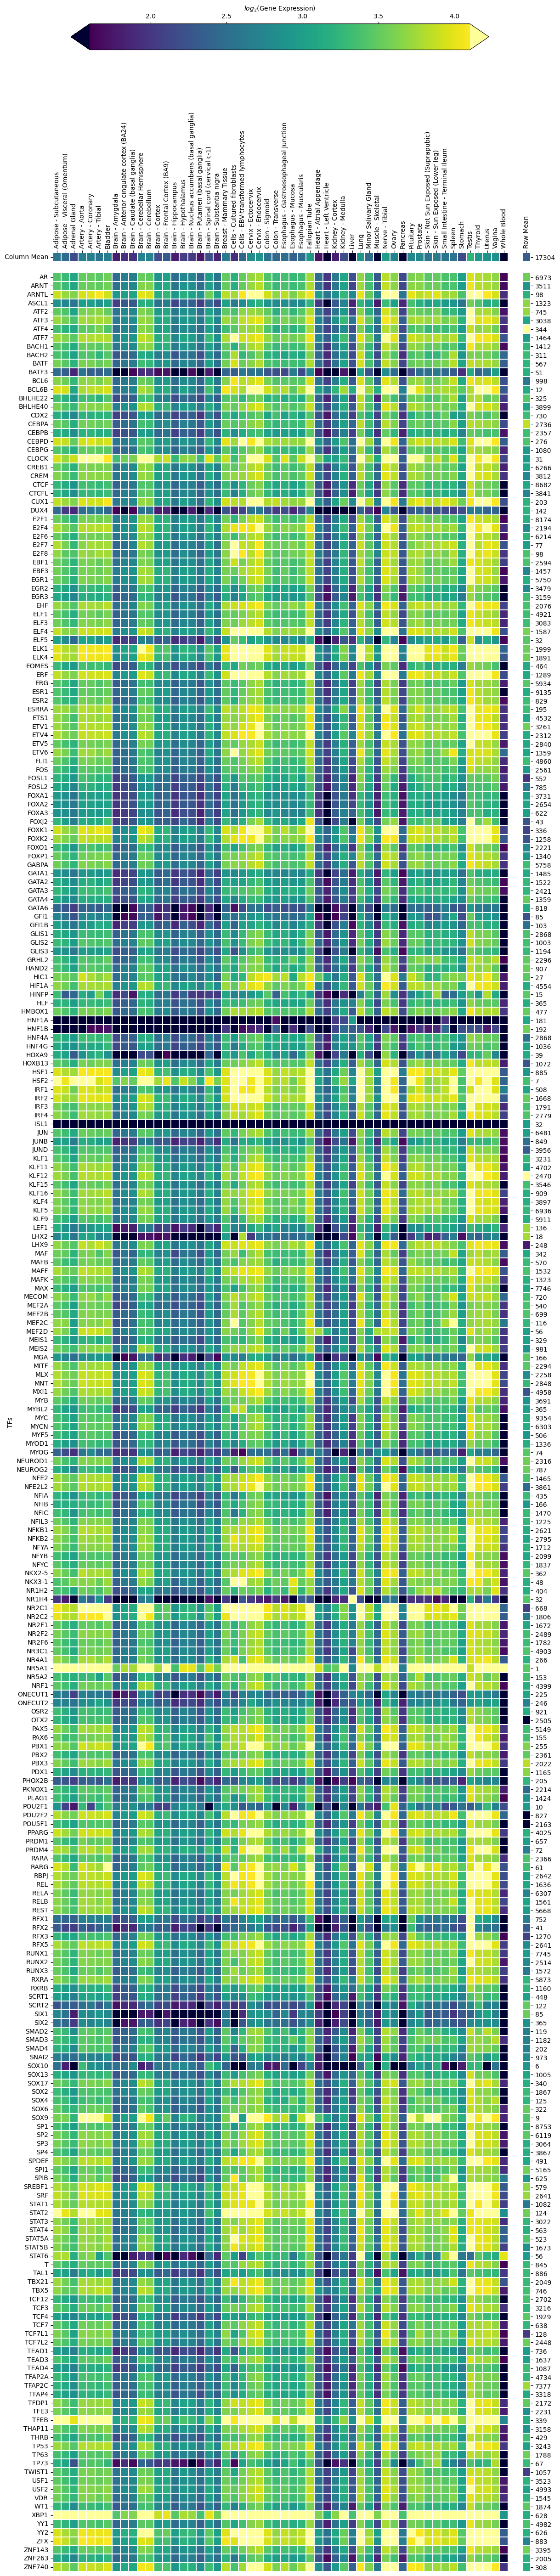

In [1077]:
value_min = 1.6
value_max = 4.1

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")
norm = mpl.colors.Normalize(vmin= value_min, vmax= value_max)

asp = mean_log2_expr_per_tissue_copy.shape[0]/float(mean_log2_expr_per_tissue_copy.shape[1])
figw = 13
figh = figw*asp


gridspec_kw = {"height_ratios":[1,266], "width_ratios" : [54,1]}
heatmapkws = dict(square=False, cbar=False,  cmap=my_cmap, fmt=".2f", linewidths=0.01, vmin= value_min, vmax= value_max, robust=True)


fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(figw, figh), gridspec_kw=gridspec_kw)

left = 0.07; right=0.87
bottom = 0.1; top = 0.9

plt.subplots_adjust(left=left, right=right,bottom=bottom, top=top, wspace=0.06, hspace=0.01)



# sns.heatmap(mean_log2_expr_per_tissue_copy, cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, vmin= value_min, vmax= value_max, robust=True)
# Mean over all tissues - row
sns.heatmap(mean_log2_expr_per_tissue_copy.iloc[:1,:54], ax=axes[0,0], xticklabels=True, yticklabels=True,  **heatmapkws)

# Mean over all Target genes - column
sns.heatmap(mean_log2_expr_per_tissue_copy.iloc[1:,54:], ax=axes[1,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(mean_log2_expr_per_tissue_copy.iloc[1:,:54], ax=axes[1,0], xticklabels=True, yticklabels=True,  **heatmapkws)
# mean gene expr over al
sns.heatmap(mean_log2_expr_per_tissue_copy.iloc[:1,54:], ax=axes[0,1], xticklabels=True, yticklabels=True,  **heatmapkws)


# axes[0,0].set_xlabel('Tissues')
axes[1,0].set_ylabel('TFs')

# oben mean tissues, x-ticks rotieren und nach oben, unten weg, y-ticks auf keine rotation
axes[0,0].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,0].tick_params(axis="y", labelrotation=0)

# kleines rechteck oben rechts, x ticks drehen und nach oben, unten entfernen, y1-ticks entfernen, y2-ticks auf rechte seite durch len(df_red) also anzahl Target gene insgesamt
axes[0,1].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,1].tick_params(axis="y", labelrotation=90)
axes[0,1].set_ylim([0,axes[0,1].get_ylim()[0]])
axes[0,1].set_yticks(axes[0,1].get_yticks())
axes[0,1].set_yticklabels([len(df_red)])
axes[0,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)

# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[1,0].set_xticklabels([])
axes[1,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[1,1].set_ylim([0,axes[1,1].get_ylim()[0]])
axes[1,1].set_yticks(axes[1,1].get_yticks())
axes[1,1].set_yticklabels(tf_id_count.values[::-1])
axes[1,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[1,1].set_xticklabels([])
axes[1,1].set_xticks([])



# Colorbar
# cax = fig.add_axes([0.12, 0.9, 0.8, 0.01])
cax = fig.add_axes([0.1,0.97,0.7,0.009])
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cax, extend='both', orientation="horizontal", location="top", label="$log_2$(Gene Expression)")

# plt.tight_layout()
plt.savefig("images_BA/target_gene_heatmap.png")

### Genexpression per Promotor per tissue ?? 

gtex Data csv, --> sort by tissues with max(sum(EXPR))

In [346]:
unique_geneID = df_combined.drop_duplicates("geneID")

In [347]:
unique_geneID_expr = unique_geneID.iloc[:,9:]

In [348]:
unique_geneID["sumExpr"] = unique_geneID_expr.sum(axis=1)

/tmp/ipykernel_1496857/2429896092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_geneID["sumExpr"] = unique_geneID_expr.sum(axis=1)


In [349]:
# Sort by chr
def custom_sort_key(chr_value):
    if chr_value.startswith('chrX'):
        return 1000
    elif chr_value.startswith('chrY'):
        return 1001
    else:
        return int(chr_value[3:])
    
def chr_lst(chr):
    chr_unique = np.array([])
    chr_out = []
    for i in chr:
        if np.isin(i, chr_unique):
            chr_out.append(np.NAN)
        else:
            chr_out.append(i)
            chr_unique = np.append(chr_unique, i)
    return np.array(chr_out)
        

In [364]:
genexpr_sort = unique_geneID.sort_values(by="chr", key=lambda x: x.apply(custom_sort_key))
genexpr_sort_df = genexpr_sort.iloc[:,9:-1]


In [352]:
chr = list(genexpr_sort.chr)
chr_out = chr_lst(chr)
chr_out

array(['chr1', 'nan', 'nan', ..., 'nan', 'nan', 'nan'], dtype='<U32')

In [365]:
#s = genexpr_sort_df.sum()
#genexpr_sort_df = genexpr_sort_df[s.sort_values(ascending=False).index[:]]
log_genexpr_sort_df = np.log2(genexpr_sort_df)[np.log2(genexpr_sort_df) != -np.inf]


/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [366]:
log_genexpr_sort_nona = log_genexpr_sort_df.dropna()

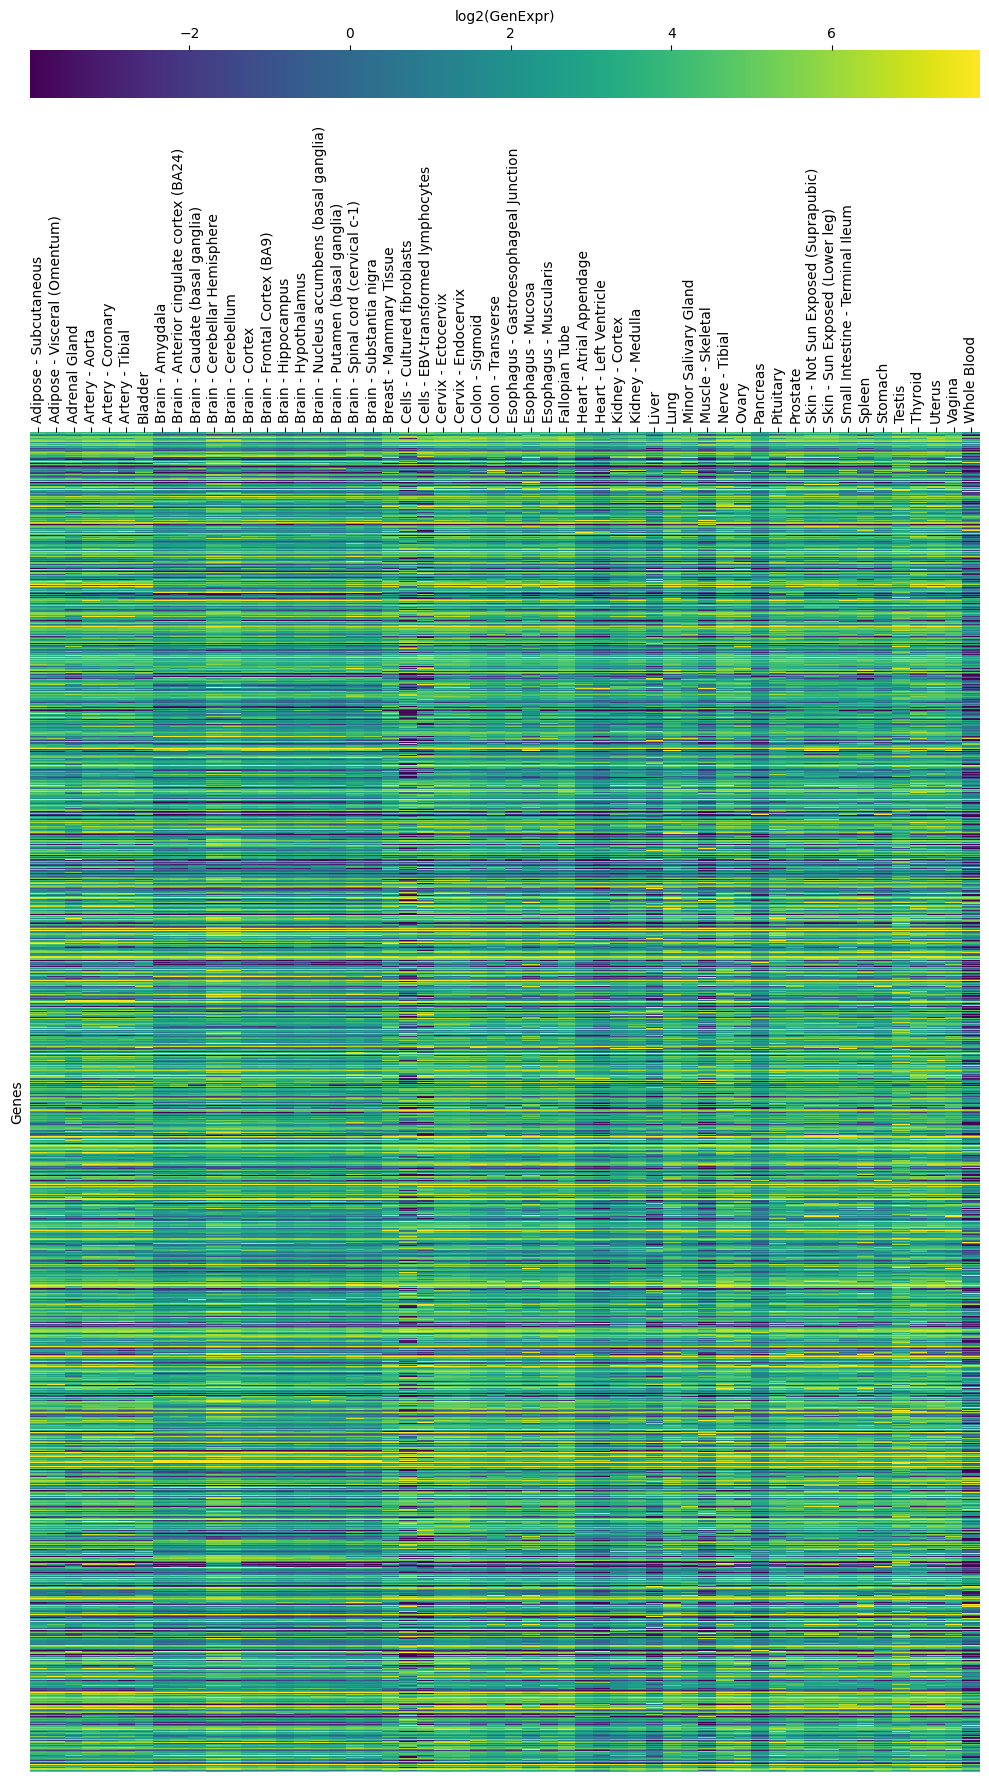

In [368]:
fig, ax = plt.subplots(figsize=(10, 20))
heatmap = sns.heatmap(log_genexpr_sort_nona,cmap="viridis", fmt=".2f", cbar_kws={"orientation": "horizontal", "location":"top","label":"log2(GenExpr)", "pad":0.17}, robust=True, yticklabels="")
#plt.title('Genexpression in different tissues')
#plt.xlabel('TFBS')
ax.set_ylabel('Genes')
#ax.set_yticks("")

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/log_GenExr_all_tissues_all_genes_sort_chr_tissue.png")
plt.show()


# Homotypic Pearson Correlation

## Data and Functions

In [148]:
len(df_combined.tf.unique())
len(df_combined_old.tf.unique())

267

In [63]:
def transform_expr_to_log_zero_to_nan(df, expr_iloc_start=9, expr_iloc_end=None):
    if expr_iloc_end is None:
        expr_iloc_end = len(df.columns)
    expr = df.iloc[:,expr_iloc_start:expr_iloc_end]
    replace_zero = expr.replace(0, np.NAN)
    expr_log2 = np.log2(replace_zero)
    df_new = df.copy()
    df_new.iloc[:,expr_iloc_start:expr_iloc_end] = expr_log2
    return df_new

In [65]:
df_log_expr = transform_expr_to_log_zero_to_nan(df_combined)
df_log_expr

chr              geneID      tf  close_tss  dist_tss  \
0        chr1  ENSG00000163209.14  HMBOX1        159       169   
1        chr1  ENSG00000143569.18  HMBOX1          9        19   
2       chr10  ENSG00000213390.10  HMBOX1         47        57   
3        chr1  ENSG00000169241.17  HMBOX1        160       170   
4        chr1  ENSG00000185499.16  HMBOX1        173       183   
...       ...                 ...     ...        ...       ...   
700911   chr7  ENSG00000105851.10  STAT5B         -3         8   
700912   chr7  ENSG00000075790.10  STAT5B        124       135   
700913   chr7   ENSG00000128590.4  STAT5B         54        69   
700914   chr7   ENSG00000198839.9  STAT5B         56        71   
700915   chr7  ENSG00000128512.20  STAT5B        105       120   

       strand_orientation  homotypic_count  all_tfbs_count  \
0                      nT                1              24   
1                       T                1              12   
2                      nT                1              73   
3                      nT                1             115   
4                      nT                1              23   
...                   ...              ...             ...   
700911                  T                1              33   
700912                 nT                1              31   
700913                  T                1              71   
700914                 nT                1             122   
700915                  T                1             104   

        all_tfbs_unique_count  Adipose - Subcutaneous  ...  \
0                          20               -0.533242  ...   
1                          11                5.667892  ...   
2                          55                2.902460  ...   
3                          81                4.980025  ...   
4                          20                2.388190  ...   
...                       ...                     ...  ...   
700911                     32                0.263034  ...   
700912                     26                4.383359  ...   
700913                     59                4.663914  ...   
700914                     89                3.385431  ...   
700915                     79                3.390943  ...   

        Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
0                                  0.164786                       -0.048412   
1                                  5.635609                        5.739038   
2                                  3.282885                        3.192825   
3                                  5.381802                        5.335569   
4                                  2.588565                        2.746528   
...                                     ...                             ...   
700911                            -1.994241                       -1.836501   
700912                             3.628190                        3.583760   
700913                             4.300490                        4.084915   
700914                             3.350497                        3.211635   
700915                             1.509949                        1.754460   

        Small Intestine - Terminal Ileum    Spleen   Stomach    Testis  \
0                               0.722466  1.029276  0.977463  1.071763   
1                               5.148527  5.299391  4.719183  6.031439   
2                               3.046666  4.332708  2.172488  5.034744   
3                               5.551208  5.715893  5.047015  4.516015   
4                               3.217231  1.586885  8.501837  5.176323   
...                                  ...       ...       ...       ...   
700911                          1.165430  2.533563 -0.800877  2.312084   
700912                          3.162371  3.263185  3.037382  4.919340   
700913                          4.377818  4.653060  4.618239  5.744430   
700914                          2.6633

In [231]:
# df_log_expr.iloc[:,9].notna()
# pearsonr(df_log_expr.homotypic_count[df_log_expr.iloc[:,9].notna()], df_log_expr.iloc[:,9][df_log_expr.iloc[:,9].notna()])

In [67]:
def get_pearson(df, tissue="GeneExpr"):
    tfs = df["tf"].unique()
    r_lst = []
    p_lst = []
    tf_lst = []
    for tf in tfs:
        df_tf = df[df["tf"] == tf]
        if len(df_tf) >= 2:
            r, p_value = pearsonr(df_tf["homotypic_count"], np.array(df_tf[tissue]))
            r_lst.append(r)
            p_lst.append(p_value)
            tf_lst.append(tf)
        else:
            print(f"{tf} has less then 2 entrys. No Correlation could be calculated")
    pearson_df = pd.DataFrame({"TFs":tf_lst, "Pearson_r":r_lst, "Pearson_p":p_lst})

    return pearson_df

    

In [69]:
def get_pearson_all_tissues(df):
    tfs = df["tf"].unique()
    tissues = np.array(df.columns[9:])
    
    # initialize Array with shape (0,54), This is important to vstack the 1D-Arrays for every tf, to genereate a 2D-array.
    r_all_tf = np.zeros([0,len(tissues)])
    p_all_tf = np.zeros([0,len(tissues)])

    tfs_lst = []
    for tf in tfs:
        df_tf = df[df["tf"] == tf]
        if len(df_tf) > 1:
            tfs_lst.append(tf)

            tfbs_counts = np.array(df_tf["homotypic_count"])
            expr = np.array(df_tf.iloc[:,9:])

            r_all_tissue = np.array([])
            p_all_tissue = np.array([])
            for tissue in range(len(tissues)):
                tissue_expr = expr[:,tissue]
                
                # REMOVE NANS for both Arrays
                mask = ~np.isnan(tissue_expr)
                tissue_expr_notNAN = tissue_expr[mask]
                tfbs_counts_notNAN = tfbs_counts[mask]
                

                r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
                r_all_tissue = np.append(r_all_tissue, r)
                p_all_tissue = np.append(p_all_tissue, p)
            # Appand r and p for single tfs into one big 2d array
            r_all_tf = np.vstack((r_all_tf, r_all_tissue))
            p_all_tf = np.vstack((p_all_tf, p_all_tissue))

        else:
            print(f"{tf} has only 1 entry. No Correlation could be calculated")
        # Add columns to DataFrame and set index to tf names
        r_df = pd.DataFrame(r_all_tf, columns=tissues)
        r_df.index = tfs_lst
        p_df = pd.DataFrame(p_all_tf, columns=tissues)
        p_df.index = tfs_lst       
        
    return r_df, p_df

## Pearson Correlation -FLAT

In [129]:
def transform_expr_to_log_zero_to_nan(df, expr_iloc_start=9, expr_iloc_end=None):
    if expr_iloc_end is None:
        expr_iloc_end = len(df.columns)
    expr = df.iloc[:,expr_iloc_start:expr_iloc_end]
    replace_zero = expr.replace(0, np.NAN)
    expr_log2 = np.log2(replace_zero)
    df_new = df.copy()
    df_new.iloc[:,expr_iloc_start:expr_iloc_end] = expr_log2
    return df_new

In [130]:
### Short way to get Pearson Correlation for flat df
def get_pearson_FLAT(df_combined, col1="homotypic_count"):
    df_log_expr = transform_expr_to_log_zero_to_nan(df_combined)
    target_gene_log_flat = flatten_tissues_expand_df(df_log_expr)
    # REMOVE NAN values from Gene Expression
    target_gene_log_flat_noNAN = target_gene_log_flat[target_gene_log_flat["GeneExpr"].notna()]
    # Group Dataframe by TF and calculate Pearson Correlation for col1 und GeneExpr
    r_p_grouped_tf = target_gene_log_flat_noNAN.groupby(["tf"]).apply(lambda x: pearsonr(x[col1], x["GeneExpr"])) 
    # Generate a DataFrame to save Result in an better format
    r_p_df_flat_df = pd.DataFrame({"TFs":r_p_grouped_tf.index, "Pearson_r":[r_p_grouped_tf[i][0] for i in range(len(r_p_grouped_tf.index))], "Pearson_p":[r_p_grouped_tf[i][1] for i in range(len(r_p_grouped_tf.index))]})
    return r_p_df_flat_df

In [57]:
r_p_df_flat_df = get_pearson_FLAT(df_combined)

/tmp/ipykernel_11449/2807192257.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_p_grouped_tf = target_gene_log_flat_noNAN.groupby(["tf"]).apply(lambda x: pearsonr(x[col1], x["GeneExpr"]))
/tmp/ipykernel_11449/2807192257.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r_p_grouped_tf = target_gene_log_flat_noNAN.groupby(["tf"]).apply(lambda x: pearsonr(x[col1], x["GeneExpr"]))
/tmp/ipykernel_11449/2807192257.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

NameError: name 'v' is not defined

In [58]:
r_p_df_flat_df

TFs  Pearson_r      Pearson_p
0        AR   0.035637  2.621109e-168
1      ARNT   0.056789  9.582940e-168
2     ARNTL  -0.013846   3.158294e-01
3     ASCL1   0.018036   8.326413e-08
4      ATF2   0.108349  7.415536e-108
..      ...        ...            ...
261     YY2   0.032123   3.501069e-09
262     ZFX   0.073437   2.378825e-61
263  ZNF143   0.065234  1.392904e-182
264  ZNF263        NaN            NaN
265  ZNF740        NaN            NaN

[266 rows x 3 columns]

In [61]:
def remove_NAN_and_p_value_and_sort_abs_r(r_p_df_flat_df, p_value=0.05):
    r_p_df = r_p_df_flat_df.dropna()
    p_filter = r_p_df[r_p_df["Pearson_p"] < p_value]
    r_sort = p_filter.sort_values(by="Pearson_r", key=lambda x:np.abs(x), ascending=False)
    
    #Transform p_values
    df = r_sort.copy()
    # df["Pearson_p"] = np.log10(r_sort["Pearson_p"])
    return r_p_df,p_filter, df
    

In [62]:
r_p_df, p_filter,  pearson_df_sort_pval = remove_NAN_and_p_value_and_sort_abs_r(r_p_df_flat_df)
# np.array(r_p_df[r_p_df["Pearson_p"]>0.01].TFs)
pearson_df_sort_pval

TFs  Pearson_r     Pearson_p
98     ISL1  -0.353881  6.695691e-49
153   NR1H4  -0.329002  4.487849e-45
253    TP73   0.221818  1.884260e-48
86    HNF1A  -0.161117  5.686210e-60
174  PHOX2B  -0.145266  9.007330e-56
..      ...        ...           ...
146   NFKB2  -0.009683  1.525588e-04
145   NFKB1   0.008570  6.439262e-04
245   TFAP4  -0.007738  5.018001e-05
232   TBX21   0.007275  1.257836e-02
103   KLF11   0.005428  4.438452e-03

[185 rows x 3 columns]

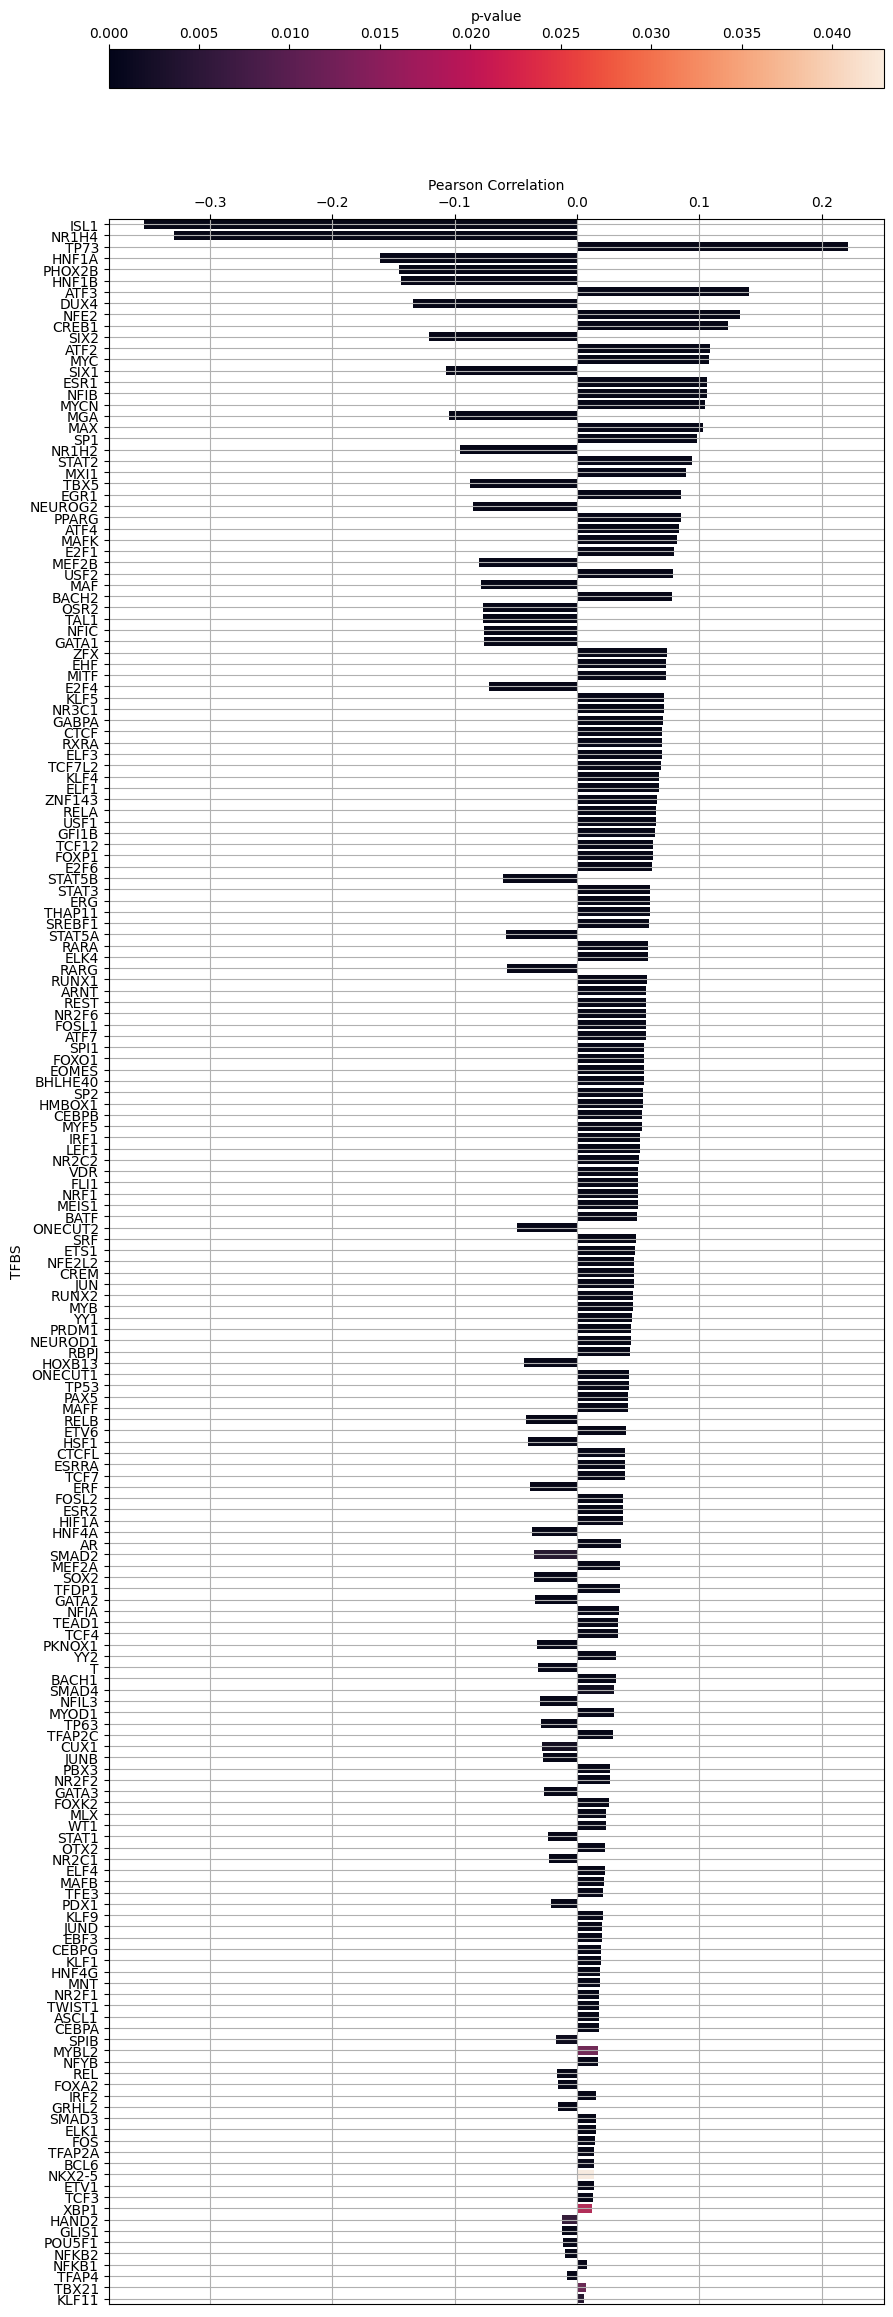

In [63]:
fig, ax = plt.subplots(figsize=(10,33))

norm = plt.Normalize(pearson_df_sort_pval["Pearson_p"].min(), pearson_df_sort_pval["Pearson_p"].max())
sm = plt.cm.ScalarMappable(cmap="rocket", norm=norm)


sns.barplot(pearson_df_sort_pval, x="Pearson_r", y="TFs",hue="Pearson_p", palette="rocket",dodge=False)


ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('Pearson Correlation')
ax.xaxis.set_label_position("top")


ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.get_legend().remove()

plt.subplots_adjust(top=0.9)
cbar = ax.figure.colorbar(sm, ax=ax, orientation= "horizontal", location="top", )
cbar.set_label("p-value")

# fig.savefig("images/homotypic_FLAT_Pearson_Bar.png")

### Filter Data for specific TFs and plot

In [64]:
r_p_df_flat_df_new = r_p_df_flat_df.set_index("TFs")
r_p_df_flat_df_new

Pearson_r      Pearson_p
TFs                             
AR       0.035637  2.621109e-168
ARNT     0.056789  9.582940e-168
ARNTL   -0.013846   3.158294e-01
ASCL1    0.018036   8.326413e-08
ATF2     0.108349  7.415536e-108
...           ...            ...
YY2      0.032123   3.501069e-09
ZFX      0.073437   2.378825e-61
ZNF143   0.065234  1.392904e-182
ZNF263        NaN            NaN
ZNF740        NaN            NaN

[266 rows x 2 columns]

In [65]:
## Specific TFs
tf_most_target_genes = ['MYC', 'ESR1', 'SP1', 'CTCF', 'E2F1', 'MAX', 'RUNX1', 'TFAP2C', 'AR', 'KLF5', 'JUN', 'RELA', 'MYCN', 'CREB1', 'E2F6', 'SP2']

tf_smallest_expr = ["NR1H4", "SOX10", "HNF1B", "HNF1A", "ISL1"]
tf_biggest_expr = ["NR5A1", "XBP1", "TFEB", "HSF2", "NR2C1"]

In [109]:
# Filter
pearson_most_target_df = r_p_df_flat_df_new.loc[tf_most_target_genes]
pearson_big_and_small_expr = r_p_df_flat_df_new.loc[tf_biggest_expr+tf_smallest_expr]

# pearson_big_and_small_expr[pearson_big_and_small_expr["Pearson_p"] > 0.05] = np.NaN

print(pearson_most_target_df)
print(pearson_big_and_small_expr)

        Pearson_r      Pearson_p
TFs                             
MYC      0.108204   0.000000e+00
ESR1     0.106630   0.000000e+00
SP1      0.097680   0.000000e+00
CTCF     0.069523   0.000000e+00
E2F1     0.079689   0.000000e+00
MAX      0.103280   0.000000e+00
RUNX1    0.057248   0.000000e+00
TFAP2C   0.029073  7.115132e-169
AR       0.035637  2.621109e-168
KLF5     0.070857   0.000000e+00
JUN      0.046271   0.000000e+00
RELA     0.064939   0.000000e+00
MYCN     0.104912   0.000000e+00
CREB1    0.123672   0.000000e+00
E2F6     0.061592   0.000000e+00
SP2      0.054196  7.459546e-268
       Pearson_r     Pearson_p
TFs                           
NR5A1        NaN           NaN
XBP1    0.012504  2.121877e-02
TFEB    0.007523  2.838254e-01
HSF2         NaN           NaN
NR2C1  -0.022881  9.969901e-06
NR1H4  -0.329002  4.487849e-45
SOX10        NaN           NaN
HNF1B  -0.143396  3.792402e-46
HNF1A  -0.161117  5.686210e-60
ISL1   -0.353881  6.695691e-49


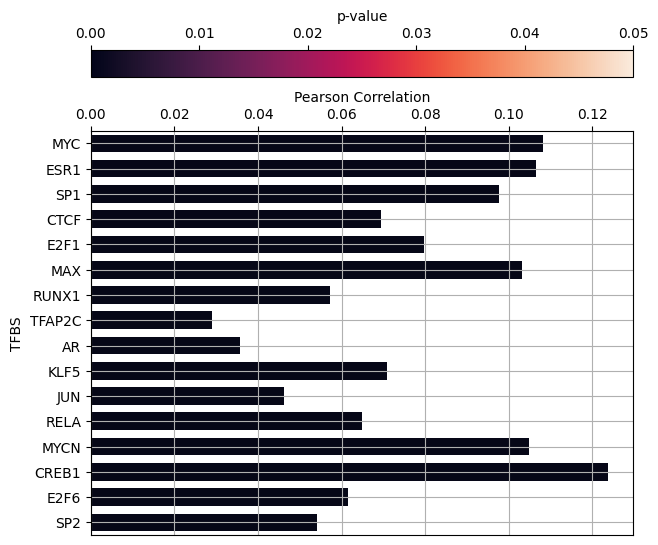

In [120]:
fig, ax = plt.subplots(figsize=(7,7))

norm = plt.Normalize(0,0.05)
sm = plt.cm.ScalarMappable(cmap="rocket", norm=norm)


sns.barplot(pearson_most_target_df, x="Pearson_r", y=pearson_most_target_df.index,hue="Pearson_p", palette="rocket",dodge=False, width=.7, hue_norm=norm)


ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('Pearson Correlation')
ax.xaxis.set_label_position("top")


ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.get_legend().remove()

# plt.subplots_adjust(top=0.9)
cbar = ax.figure.colorbar(sm, ax=ax, orientation= "horizontal", location="top", pad=.1)
cbar.set_label("p-value")

# fig.savefig("images/homotypic_FLAT_Pearson_Bar_most_target.png")

## Pearson Correlation -ALL

In [71]:
r_df, p_df = get_pearson_all_tissues(df_log_expr)

C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the corr

NR5A1 has only 1 entry. No Correlation could be calculated


C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\julia\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [73]:
r_df

Adipose - Subcutaneous  Adipose - Visceral (Omentum)  Adrenal Gland  \
HMBOX1                0.049369                      0.046334       0.052607   
PKNOX1               -0.047389                     -0.056547      -0.032954   
NR2C2                 0.050271                      0.044005       0.049566   
CLOCK                 0.025361                      0.015014       0.000034   
TP63                 -0.020652                     -0.031362      -0.040114   
...                        ...                           ...            ...   
RXRB                       NaN                           NaN            NaN   
KLF9                  0.025773                      0.024631       0.020681   
BATF                  0.030420                      0.029287       0.031757   
PLAG1                      NaN                           NaN            NaN   
STAT5B               -0.055981                     -0.054628      -0.074747   

        Artery - Aorta  Artery - Coronary  Artery - Tibial   Bladder  \
HMBOX1        0.054011           0.052841         0.052670  0.054969   
PKNOX1       -0.042267          -0.044801        -0.038387 -0.042006   
NR2C2         0.057841           0.055751         0.061289  0.063838   
CLOCK         0.022819           0.007864         0.036301  0.031926   
TP63         -0.018824          -0.023537        -0.029879 -0.016541   
...                ...                ...              ...       ...   
RXRB               NaN                NaN              NaN       NaN   
KLF9          0.016606           0.016276         0.021818  0.021726   
BATF          0.058186           0.036274         0.030691  0.040711   
PLAG1              NaN                NaN              NaN       NaN   
STAT5B       -0.064625          -0.068901        -0.063327 -0.054019   

        Brain - Amygdala  Brain - Anterior cingulate cortex (BA24)  \
HMBOX1          0.055941                                  0.061884   
PKNOX1         -0.010465                                 -0.003570   
NR2C2           0.040826                                  0.046499   
CLOCK           0.017861                                  0.025380   
TP63           -0.052116                                 -0.047310   
...                  ...                                       ...   
RXRB                 NaN                                       NaN   
KLF9            0.016121                                  0.020197   
BATF            0.108880                                  0.090181   
PLAG1                NaN                                       NaN   
STAT5B         -0.083749                                 -0.071332   

        Brain - Caudate (basal ganglia)  ...  \
HMBOX1                         0.058784  ...   
PKNOX1                         0.003132  ...   
NR2C2                          0.047430  ...   
CLOCK                          0.006495  ...   
TP63                          -0.060409  ...   
...                                 ...  ...   
RXRB                                NaN  ...   
KLF9                           0.008825  ...   
BATF                           0.113730  ...   
PLAG1                               NaN  ...   
STAT5B                        -0.094144  ...   

        Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
HMBOX1                             0.062568                        0.060484   
PKNOX1                            -0.029767                       -0.030391   
NR2C2                              0.048199                        0.048736   
CLOCK                              0.034840                        0.015742   
TP63                               0.046064                        0.045625   
...                                     ...                             ...   
RXRB                                    NaN                             NaN   
KLF9                               0.048461                        0.051381   
BATF                               0.003789                      

In [107]:
# Which TFBS have only one TFBS per Promotor?
na_r = pearson_df.Pearson_r.isna().to_numpy()
#pearson_df[na_r].TFs.to_numpy()
pearson_df_sort = pearson_df.reindex(pearson_df["Pearson_r"].abs().sort_values(ascending=False).index).dropna()
pearson_df_sort_pval = pearson_df_sort[pearson_df_sort["Pearson_p"] < 0.05]
pearson_df_sort_pval["Pearson_p"] = -np.log10(pearson_df_sort)

SyntaxError: unexpected EOF while parsing (3277195463.py, line 6)

In [75]:
# Which TFBS have only one TFBS per Promotor?
np.array(sorted(r_df[np.all(r_df.isna(), axis=1)].index.to_numpy()))

array(['BATF3', 'BCL6B', 'CEBPD', 'E2F7', 'E2F8', 'EGR3', 'ELF5', 'ETV5',
       'FOXA3', 'FOXJ2', 'FOXK1', 'GFI1', 'GLIS2', 'GLIS3', 'HIC1',
       'HINFP', 'HOXA9', 'HSF2', 'KLF12', 'KLF15', 'KLF16', 'LHX2',
       'MECOM', 'MEF2C', 'MEF2D', 'MEIS2', 'NFYC', 'NKX3-1', 'NR4A1',
       'NR5A2', 'PAX6', 'PBX1', 'PLAG1', 'POU2F1', 'PRDM4', 'RFX2',
       'RFX3', 'RUNX3', 'RXRB', 'SCRT1', 'SCRT2', 'SOX10', 'SOX4', 'SOX6',
       'SOX9', 'SP3', 'SP4', 'SPDEF', 'STAT4', 'STAT6', 'TCF7L1', 'TEAD3',
       'THRB', 'ZNF263', 'ZNF740', 'chrf28811'], dtype='<U9')

In [95]:
# Sort both DataFrames based on the sum of the correlation coefficient and remove NANs.
r_df_s = r_df.reindex(abs(r_df.sum(axis=1)).sort_values(ascending=False).index).dropna()
p_df_s = p_df.reindex(abs(r_df.sum(axis=1)).sort_values(ascending=False).index).dropna()

Adipose - Subcutaneous  Adipose - Visceral (Omentum)  Adrenal Gland  \
ISL1                 -0.354967                     -0.360304      -0.200165   
NR1H4                -0.037553                     -0.170793      -0.386689   
TP73                  0.272332                      0.319561       0.244256   
HNF1A                -0.211272                     -0.239639      -0.201701   
PHOX2B               -0.131292                     -0.095624      -0.190796   
...                        ...                           ...            ...   
GATA6                 0.013924                     -0.007052       0.044371   
ETV4                  0.011251                      0.010966      -0.005320   
POU2F2                0.018609                     -0.023894       0.030713   
RFX5                  0.012350                     -0.003655       0.007511   
NFYA                 -0.017770                     -0.021966      -0.029952   

        Artery - Aorta  Artery - Coronary  Artery - Tibial   Bladder  \
ISL1         -0.434683          -0.254955        -0.351210 -0.415590   
NR1H4         0.000544          -0.114692         0.326133 -0.371597   
TP73          0.293818           0.294898         0.432998  0.266083   
HNF1A        -0.212059          -0.205639        -0.228990 -0.219887   
PHOX2B       -0.165893          -0.172292        -0.222898 -0.131152   
...                ...                ...              ...       ...   
GATA6        -0.032124          -0.013160        -0.003732 -0.005383   
ETV4          0.005899           0.006381         0.006650  0.000286   
POU2F2        0.013204           0.013839         0.020097  0.019039   
RFX5         -0.005867          -0.012655        -0.002703 -0.007122   
NFYA         -0.012963          -0.013924        -0.000063 -0.011462   

        Brain - Amygdala  Brain - Anterior cingulate cortex (BA24)  \
ISL1           -0.529215                                 -0.495137   
NR1H4          -0.564138                                 -0.563728   
TP73            0.188168                                  0.265100   
HNF1A          -0.200042                                 -0.135825   
PHOX2B         -0.199947                                 -0.156189   
...                  ...                                       ...   
GATA6           0.034005                                  0.003793   
ETV4           -0.004994                                  0.000761   
POU2F2          0.011725                                  0.021032   
RFX5           -0.001818                                 -0.012930   
NFYA            0.020467                                  0.016435   

        Brain - Caudate (basal ganglia)  ...  \
ISL1                          -0.410246  ...   
NR1H4                         -0.558757  ...   
TP73                           0.082547  ...   
HNF1A                         -0.184365  ...   
PHOX2B                        -0.196013  ...   
...                                 ...  ...   
GATA6                          0.049047  ...   
ETV4                          -0.007244  ...   
POU2F2                         0.015229  ...   
RFX5                          -0.011437  ...   
NFYA                           0.012377  ...   

        Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
ISL1                              -0.232233                       -0.221033   
NR1H4                             -0.321238                       -0.179673   
TP73                               0.146978                        0.134311   
HNF1A                             -0.098098                       -0.126524   
PHOX2B                            -0.120752                       -0.109852   
...                                     ...                             ...   
GATA6                             -0.012091                        0.032189   
ETV4                               0.003839                        0.003794   
POU2F2                            -0.038341                      

In [79]:
r_df_filtered_by_p_value = r_df_s[p_df_s<0.05]
r_df_filtered_by_p_value[np.all(r_df_filtered_by_p_value.isna(), axis=1)].index

Index(['STAT2', 'GFI1B', 'MEIS1', 'HMBOX1', 'LEF1', 'ONECUT2', 'ONECUT1',
       'ESRRA', 'TCF7', 'TEAD1', 'YY2', 'SMAD4', 'CUX1', 'NR2C1', 'ELF4',
       'MAFB', 'PDX1', 'EBF3', 'CEBPG', 'TWIST1', 'IRF2', 'LHX9', 'NKX2-5',
       'ARNTL', 'BCL6', 'XBP1', 'CLOCK', 'POU5F1', 'RFX1', 'TFEB', 'SOX17',
       'KLF11', 'EGR2', 'GATA4', 'SOX13', 'MYOG', 'TEAD4', 'HLF', 'PBX2',
       'ETV4', 'POU2F2', 'RFX5', 'NFYA'],
      dtype='object')

In [81]:
r_df_filtered_by_p_value_remove_nan_rows = r_df_filtered_by_p_value[~np.all(r_df_filtered_by_p_value.isna(), axis=1)]
r_df_filtered_by_p_value_remove_nan_rows_sort_by_mean = r_df_filtered_by_p_value_remove_nan_rows.reindex(abs(r_df_filtered_by_p_value_remove_nan_rows.mean(axis=1, skipna=True)).sort_values(ascending=False).index)

#### Plot

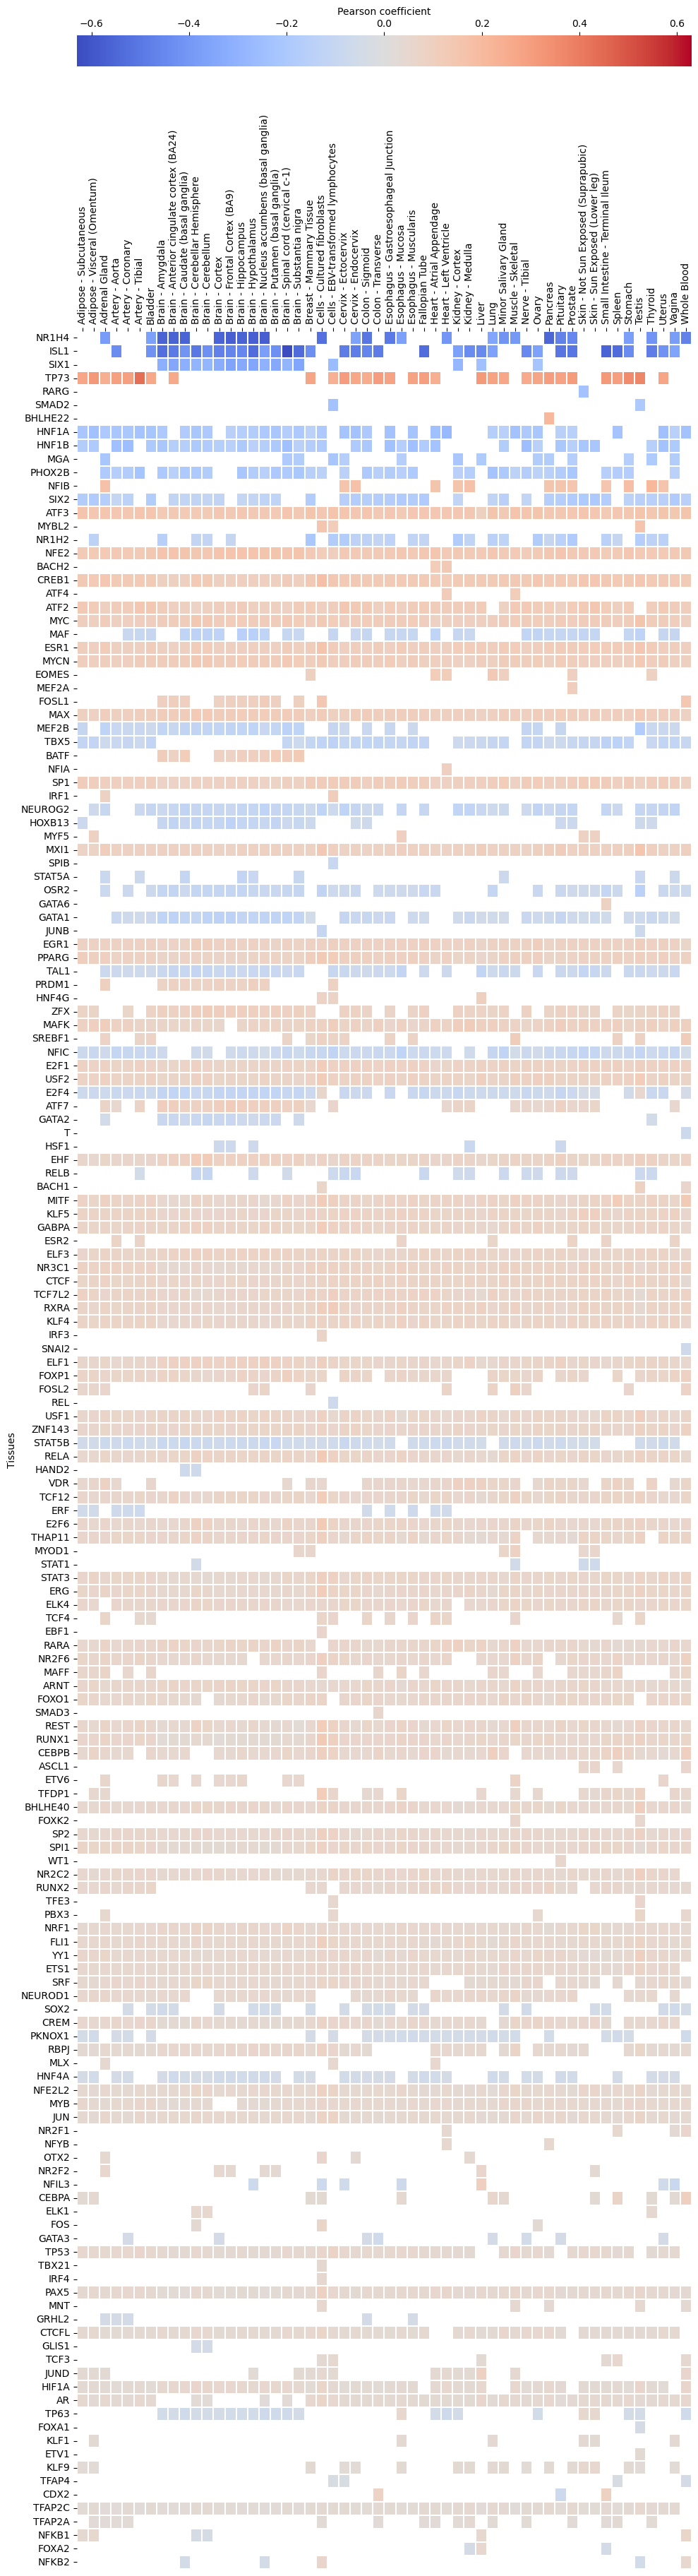

In [83]:
value_max = max(max(abs(r_df_filtered_by_p_value.max())), max(abs(r_df_filtered_by_p_value.min())))
value_min = -value_max


fig, ax = plt.subplots(figsize=(10,42))
heatmap = sns.heatmap(r_df_filtered_by_p_value_remove_nan_rows_sort_by_mean, cmap='coolwarm', fmt=".2f", linewidths=0.01,vmin=value_min, vmax=value_max, cbar_kws={"orientation": "horizontal", "location":"top", "label":"Pearson coefficient", "pad":0.09})
#plt.title('Genexpression in different tissues')
plt.xlabel('TFBS')
plt.ylabel('Tissues')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
# fig.savefig("images/Pearson_filtered_remove_p_sort_by_mean_withoutNAN.png")
plt.show()

#### Filter Data for specific TFBS and plot 

In [109]:
r_df_filtered_by_p_value
r_df_filt = r_df[p_df<0.05]
r_df_filt

Adipose - Subcutaneous  Adipose - Visceral (Omentum)  Adrenal Gland  \
HMBOX1                     NaN                           NaN            NaN   
PKNOX1               -0.047389                     -0.056547            NaN   
NR2C2                 0.050271                      0.044005       0.049566   
CLOCK                      NaN                           NaN            NaN   
TP63                       NaN                           NaN            NaN   
...                        ...                           ...            ...   
RXRB                       NaN                           NaN            NaN   
KLF9                  0.025773                      0.024631            NaN   
BATF                       NaN                           NaN            NaN   
PLAG1                      NaN                           NaN            NaN   
STAT5B               -0.055981                     -0.054628      -0.074747   

        Artery - Aorta  Artery - Coronary  Artery - Tibial   Bladder  \
HMBOX1             NaN                NaN              NaN       NaN   
PKNOX1       -0.042267          -0.044801              NaN -0.042006   
NR2C2         0.057841           0.055751         0.061289  0.063838   
CLOCK              NaN                NaN              NaN       NaN   
TP63               NaN                NaN              NaN       NaN   
...                ...                ...              ...       ...   
RXRB               NaN                NaN              NaN       NaN   
KLF9               NaN                NaN              NaN       NaN   
BATF               NaN                NaN              NaN       NaN   
PLAG1              NaN                NaN              NaN       NaN   
STAT5B       -0.064625          -0.068901        -0.063327 -0.054019   

        Brain - Amygdala  Brain - Anterior cingulate cortex (BA24)  \
HMBOX1               NaN                                       NaN   
PKNOX1               NaN                                       NaN   
NR2C2           0.040826                                  0.046499   
CLOCK                NaN                                       NaN   
TP63           -0.052116                                 -0.047310   
...                  ...                                       ...   
RXRB                 NaN                                       NaN   
KLF9                 NaN                                       NaN   
BATF            0.108880                                  0.090181   
PLAG1                NaN                                       NaN   
STAT5B         -0.083749                                 -0.071332   

        Brain - Caudate (basal ganglia)  ...  \
HMBOX1                              NaN  ...   
PKNOX1                              NaN  ...   
NR2C2                          0.047430  ...   
CLOCK                               NaN  ...   
TP63                          -0.060409  ...   
...                                 ...  ...   
RXRB                                NaN  ...   
KLF9                                NaN  ...   
BATF                           0.113730  ...   
PLAG1                               NaN  ...   
STAT5B                        -0.094144  ...   

        Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
HMBOX1                                  NaN                             NaN   
PKNOX1                                  NaN                             NaN   
NR2C2                              0.048199                        0.048736   
CLOCK                                   NaN                             NaN   
TP63                               0.046064                        0.045625   
...                                     ...                             ...   
RXRB                                    NaN                             NaN   
KLF9                               0.048461                        0.051381   
BATF                                    NaN                      

In [ ]:
## Specific TFs
tf_most_target_genes = ['MYC', 'ESR1', 'SP1', 'CTCF', 'E2F1', 'MAX', 'RUNX1', 'TFAP2C', 'AR', 'KLF5', 'JUN', 'RELA', 'MYCN', 'CREB1', 'E2F6', 'SP2']

tf_smallest_expr = ["NR1H4", "SOX10", "HNF1B", "HNF1A", "ISL1"]
tf_biggest_expr = ["NR5A1", "XBP1", "TFEB", "HSF2", "NR2C1"]

In [101]:
# ['NR5A1', 'HSF2', 'SOX10'] not in r_df_filtered_by_p_value
# NR5A1 not in r_df_filt
tf_biggest_expr = ["XBP1", "TFEB", "HSF2", "NR2C1"]

In [ ]:
r_heat_most_target = r_df_filt.loc[tf_most_target_genes]
r_heat_biggest_smallest_expr = r_df_filt.loc[tf_biggest_expr + tf_smallest_expr]

In [115]:
r_heat_biggest_smallest_expr

Adipose - Subcutaneous  Adipose - Visceral (Omentum)  Adrenal Gland  \
XBP1                      NaN                           NaN            NaN   
TFEB                      NaN                           NaN            NaN   
HSF2                      NaN                           NaN            NaN   
NR2C1                     NaN                           NaN            NaN   
NR1H4                     NaN                           NaN      -0.386689   
SOX10                     NaN                           NaN            NaN   
HNF1B               -0.175853                     -0.188916            NaN   
HNF1A               -0.211272                     -0.239639      -0.201701   
ISL1                      NaN                           NaN            NaN   

       Artery - Aorta  Artery - Coronary  Artery - Tibial   Bladder  \
XBP1              NaN                NaN              NaN       NaN   
TFEB              NaN                NaN              NaN       NaN   
HSF2              NaN                NaN              NaN       NaN   
NR2C1             NaN                NaN              NaN       NaN   
NR1H4             NaN                NaN              NaN -0.371597   
SOX10             NaN                NaN              NaN       NaN   
HNF1B       -0.241561          -0.252855              NaN -0.193182   
HNF1A       -0.212059          -0.205639         -0.22899 -0.219887   
ISL1        -0.434683                NaN              NaN -0.415590   

       Brain - Amygdala  Brain - Anterior cingulate cortex (BA24)  \
XBP1                NaN                                       NaN   
TFEB                NaN                                       NaN   
HSF2                NaN                                       NaN   
NR2C1               NaN                                       NaN   
NR1H4         -0.564138                                 -0.563728   
SOX10               NaN                                       NaN   
HNF1B         -0.212847                                 -0.165249   
HNF1A         -0.200042                                       NaN   
ISL1          -0.529215                                 -0.495137   

       Brain - Caudate (basal ganglia)  ...  \
XBP1                               NaN  ...   
TFEB                               NaN  ...   
HSF2                               NaN  ...   
NR2C1                              NaN  ...   
NR1H4                        -0.558757  ...   
SOX10                              NaN  ...   
HNF1B                        -0.163952  ...   
HNF1A                        -0.184365  ...   
ISL1                         -0.410246  ...   

       Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
XBP1                                   NaN                             NaN   
TFEB                                   NaN                             NaN   
HSF2                                   NaN                             NaN   
NR2C1                                  NaN                             NaN   
NR1H4                                  NaN                             NaN   
SOX10                                  NaN                             NaN   
HNF1B                            -0.207709                       -0.209116   
HNF1A                                  NaN                             NaN   
ISL1                                   NaN                             NaN   

       Small Intestine - Terminal Ileum    Spleen   Stomach  Testis   Thyroid  \
XBP1                                NaN       NaN       NaN     NaN       NaN   
TFEB                                NaN       NaN       NaN     NaN       NaN   
HSF2                                NaN       NaN       NaN     NaN       NaN   
NR2C1                               NaN       NaN       NaN     NaN       NaN   
NR1H4                               NaN       NaN -0.374199     NaN -0.411642   
SOX10                               NaN       NaN       NaN     NaN       NaN   
HNF1B

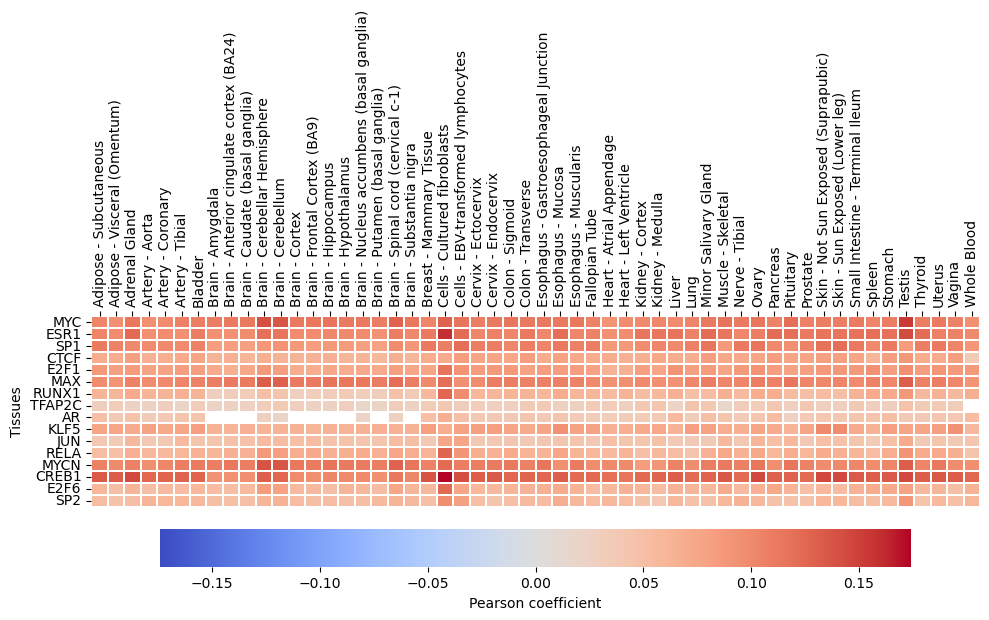

In [165]:
value_max = max(max(abs(r_heat_most_target.max())), max(abs(r_heat_most_target.min())))
value_min = -value_max


fig, ax = plt.subplots(figsize=(10,6))
heatmap = sns.heatmap(r_heat_most_target, cmap='coolwarm', fmt=".2f", linewidths=0.01,vmin=value_min,vmax=value_max, cbar_kws={"orientation": "horizontal", "location":"bottom", "label":"Pearson coefficient", "pad":0.09})
#plt.title('Genexpression in different tissues')
plt.xlabel('TFBS')
plt.ylabel('Tissues')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
# fig.savefig("images/Pearson_filtered_remove_p_MOST_TARGET.png")
plt.show()